In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from datetime import datetime as dt
import sweetviz
from sklearn.model_selection import train_test_split
from sklearn import svm
from math import ceil
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbPipe
from xgboost import  XGBClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

### Análisis de la Información

In [2]:
z_train = pd.read_csv('z_train.csv')
z_test = pd.read_csv('z_test.csv')

In [3]:
report_ztrain = sweetviz.analyze(z_train)

                                             |          | [  0%]   00:00 -> (? left)

In [4]:
report_ztest = sweetviz.analyze(z_test)

                                             |          | [  0%]   00:00 -> (? left)


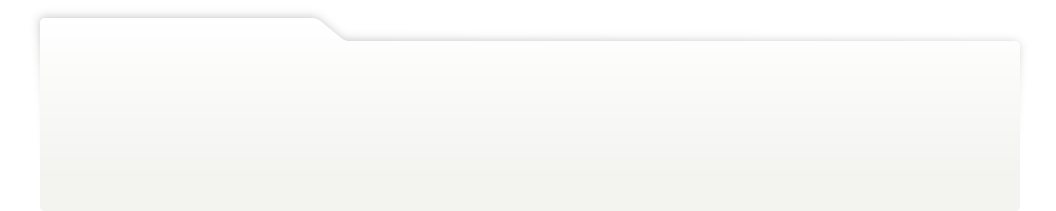
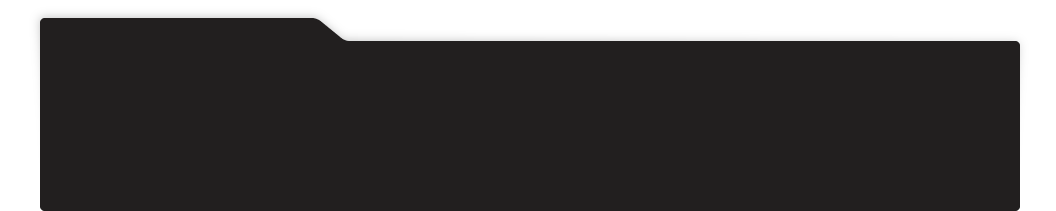
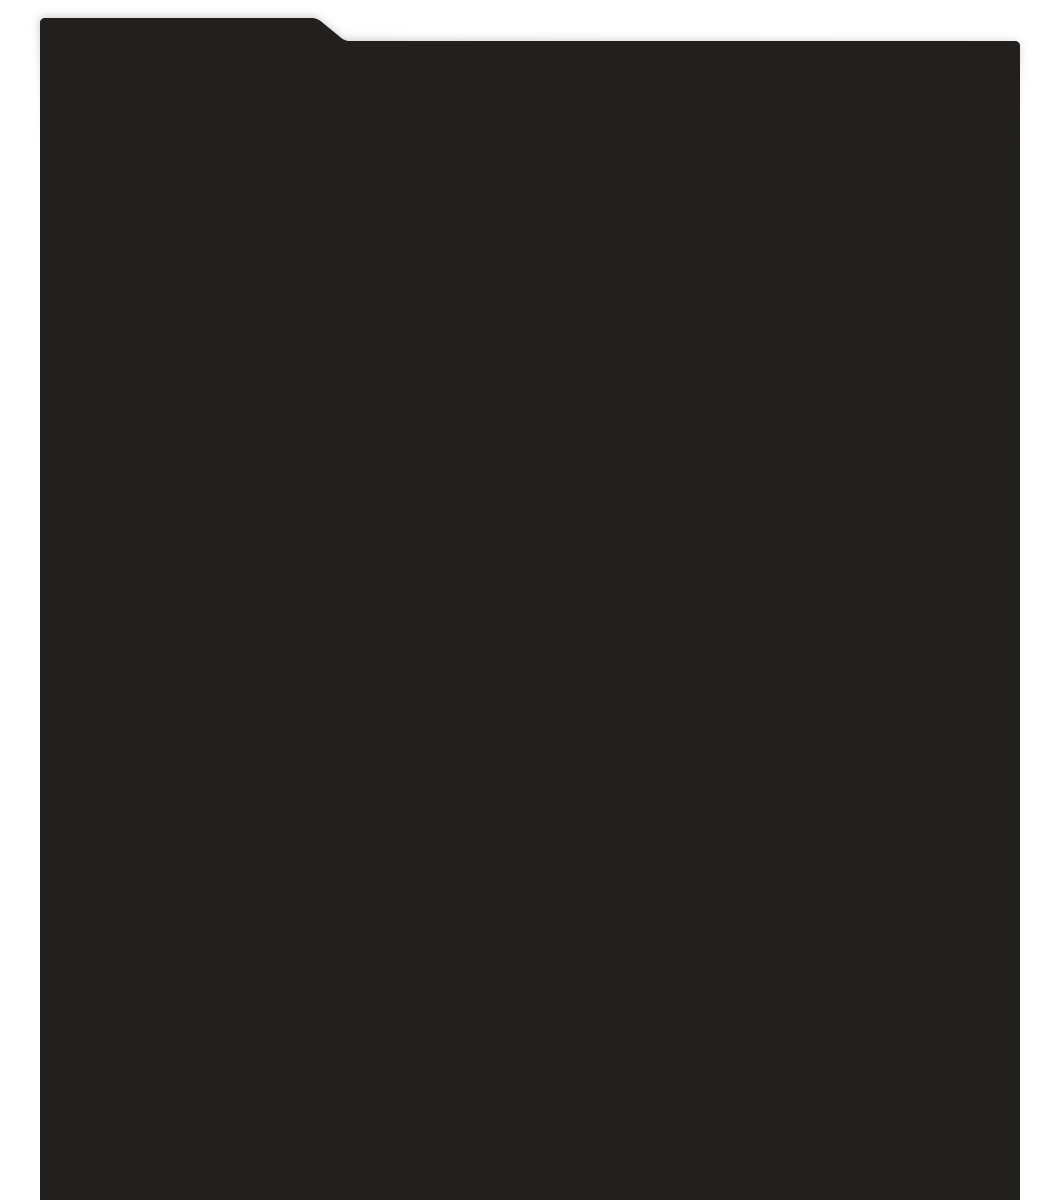
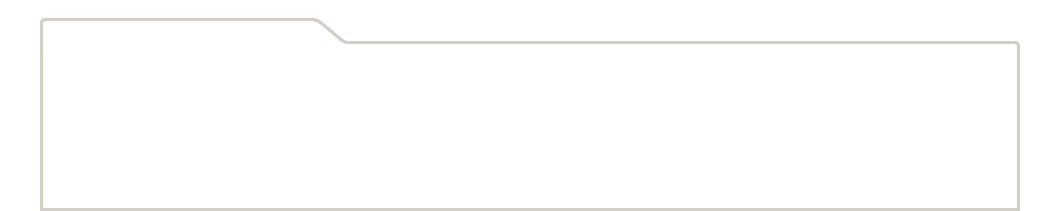
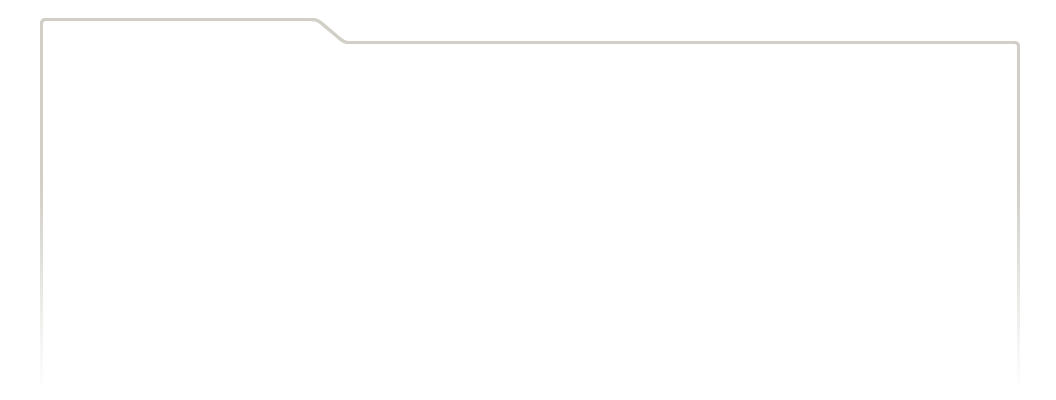
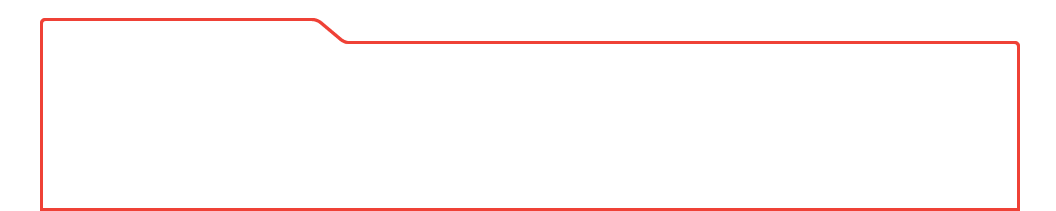
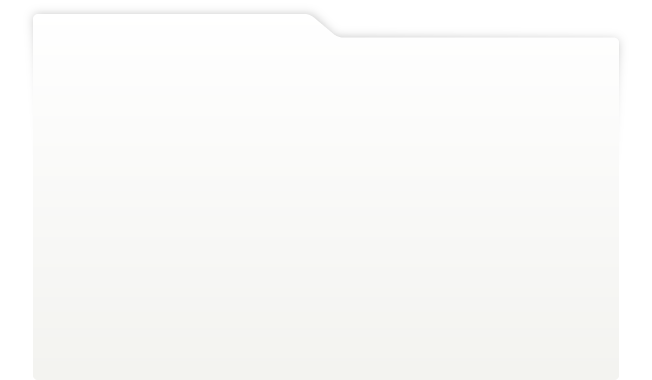
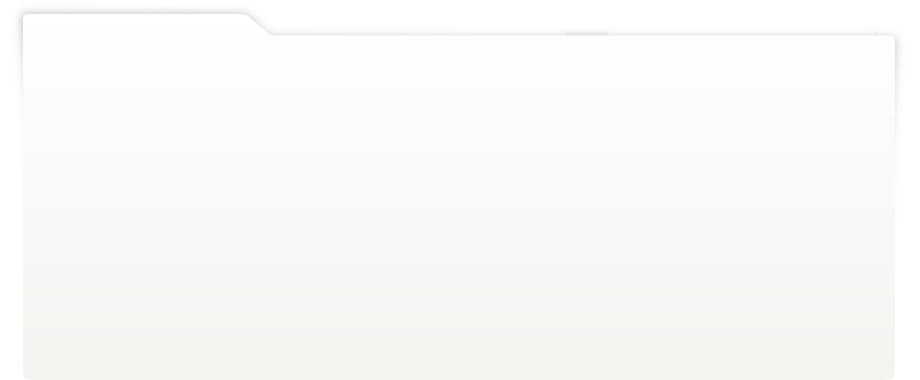
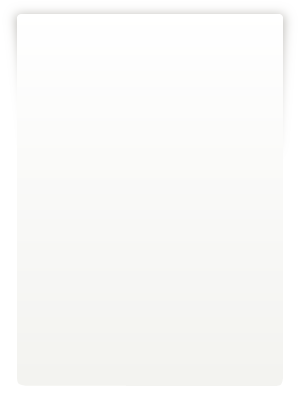
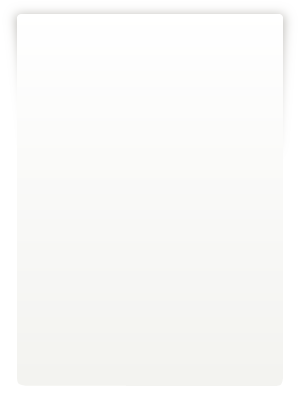
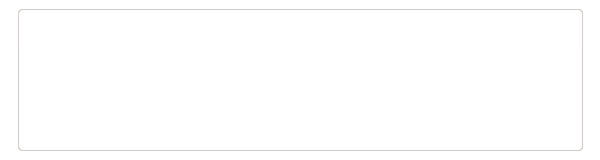
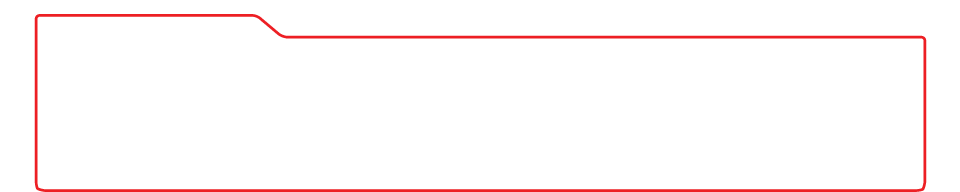
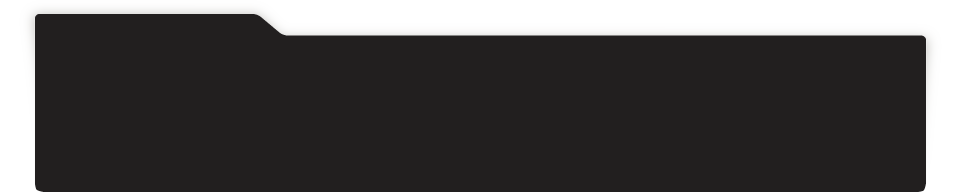
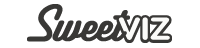
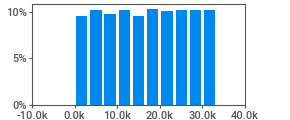
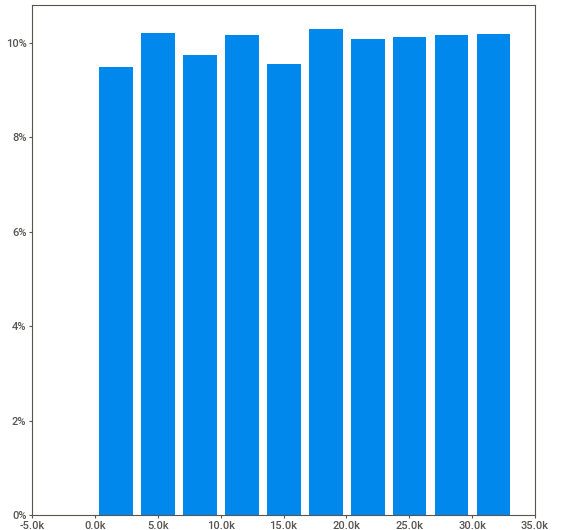
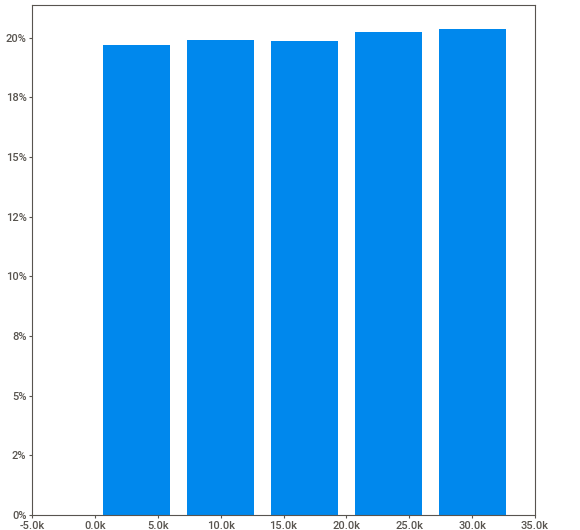
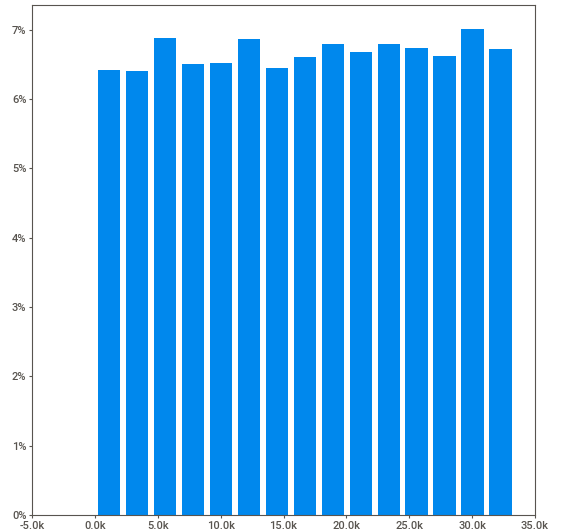
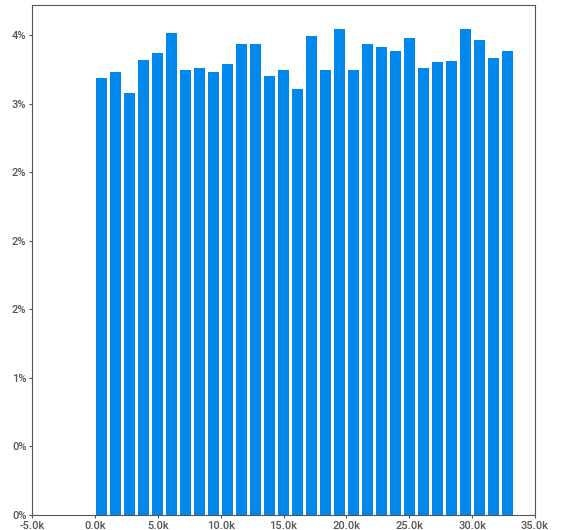
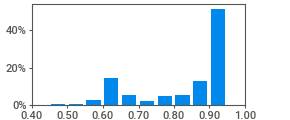
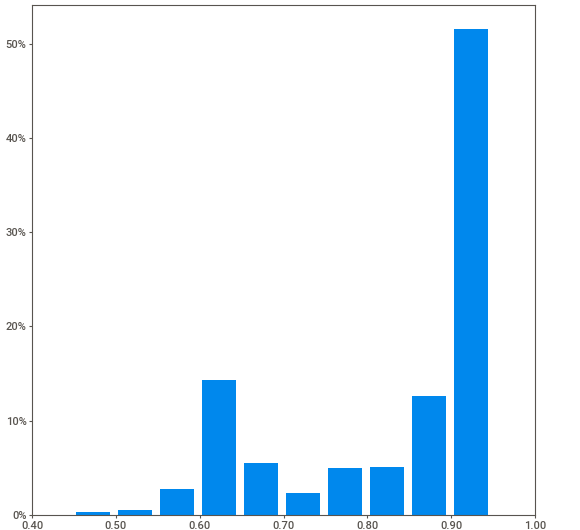
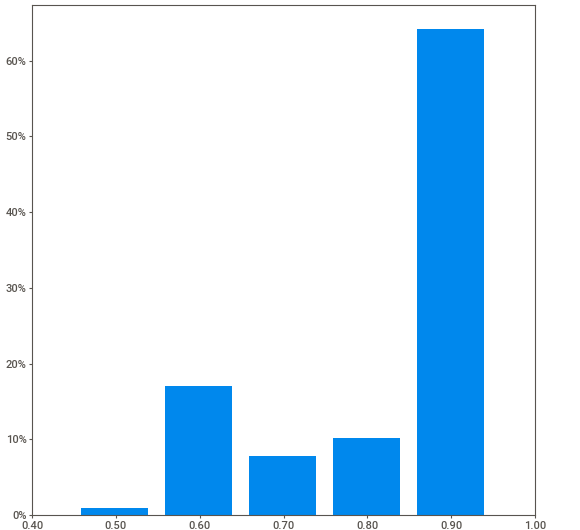
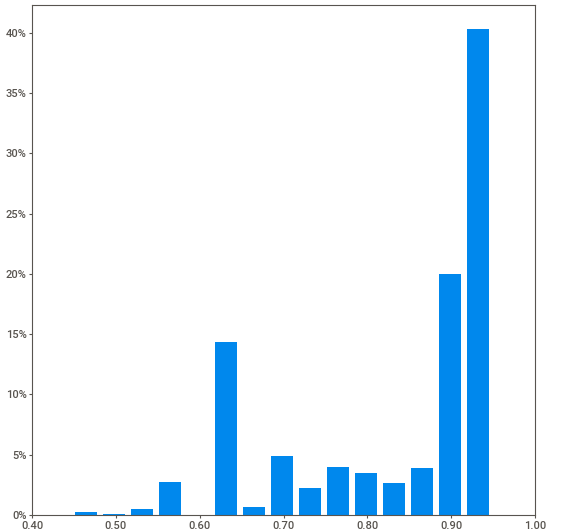
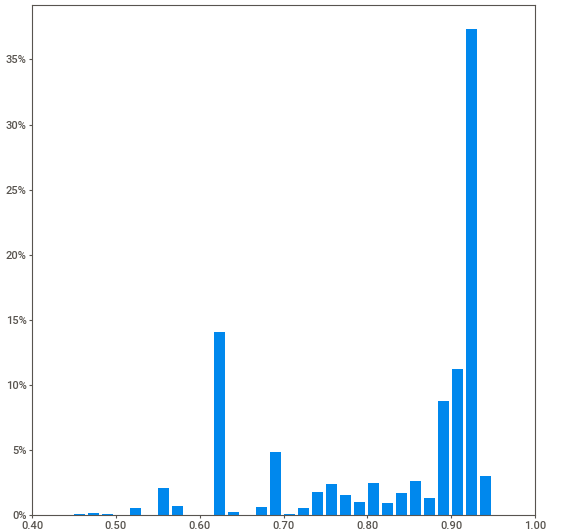
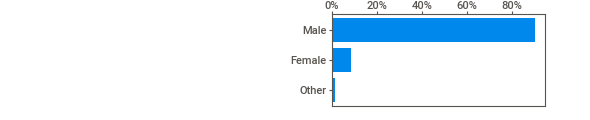
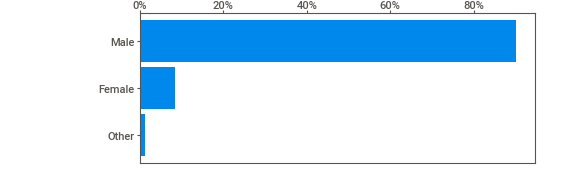
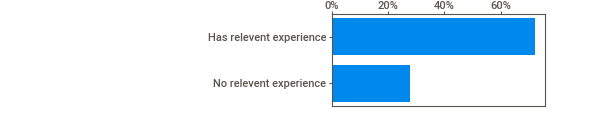
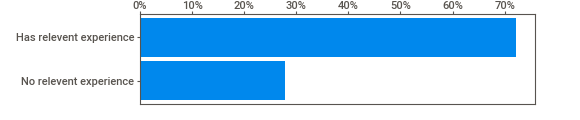
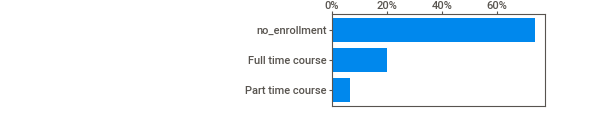
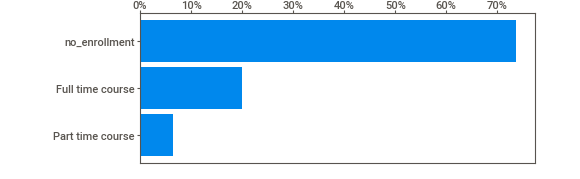
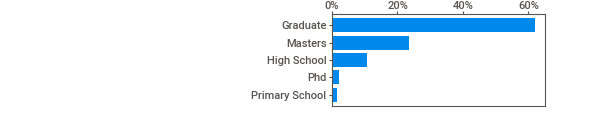
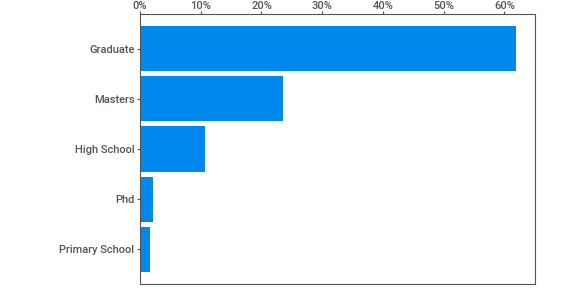
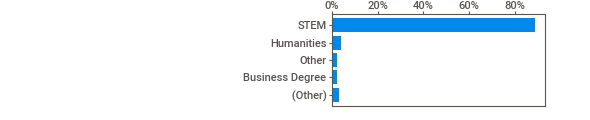
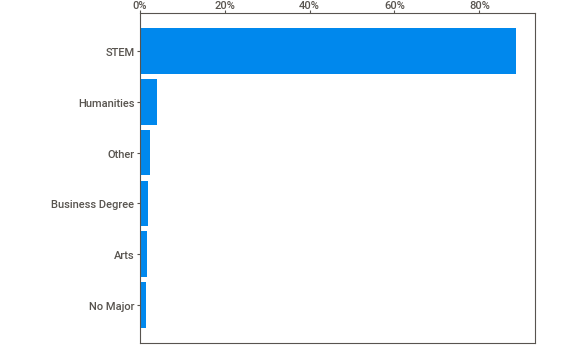
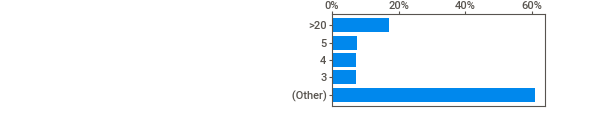
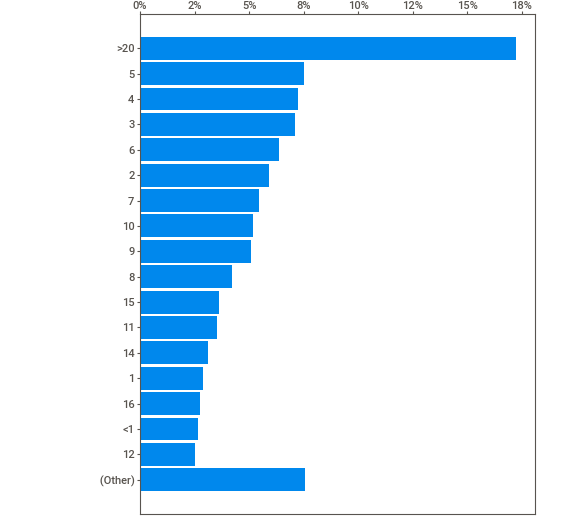
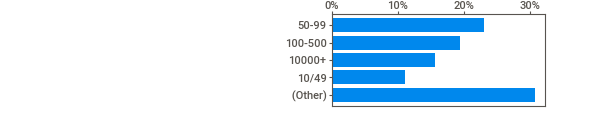
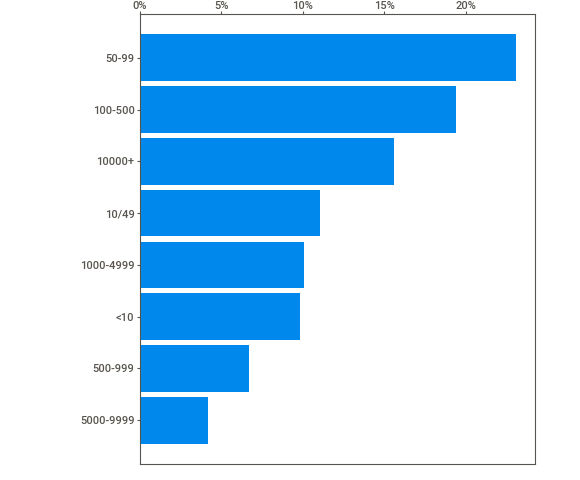
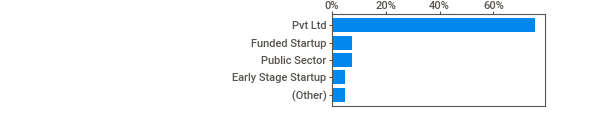
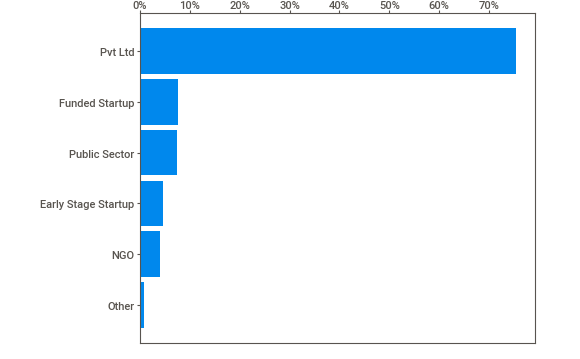
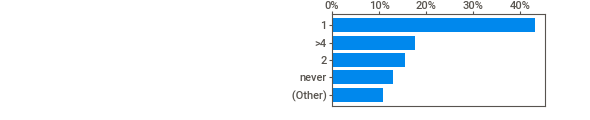
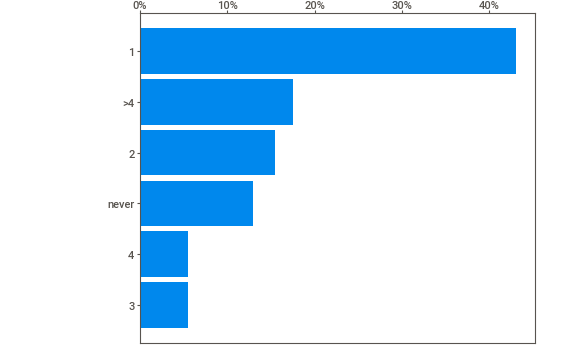
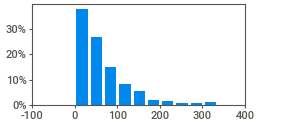
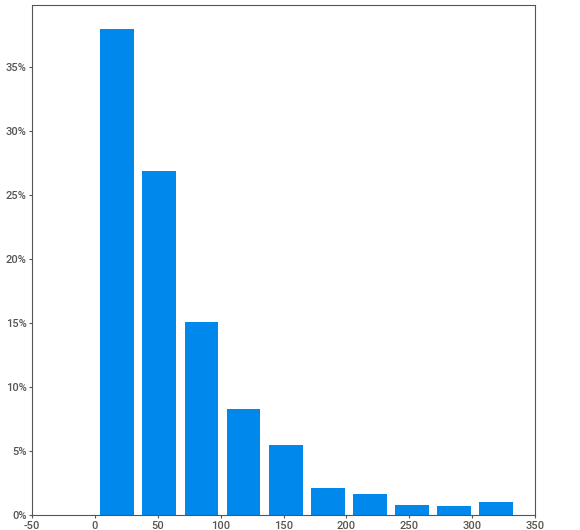
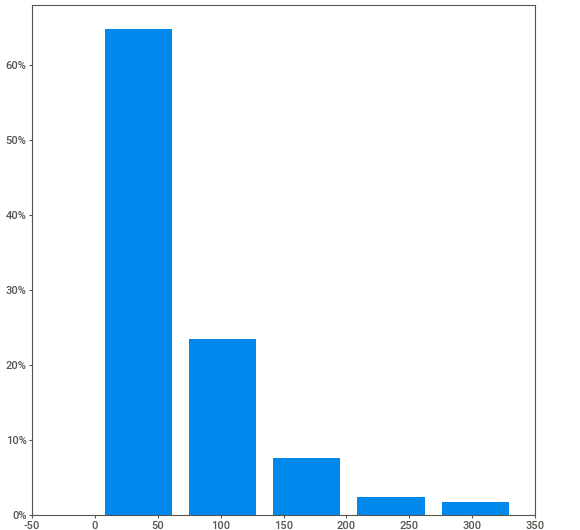
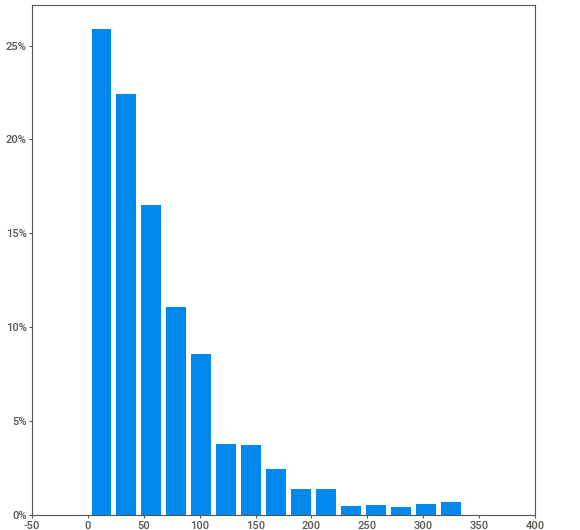
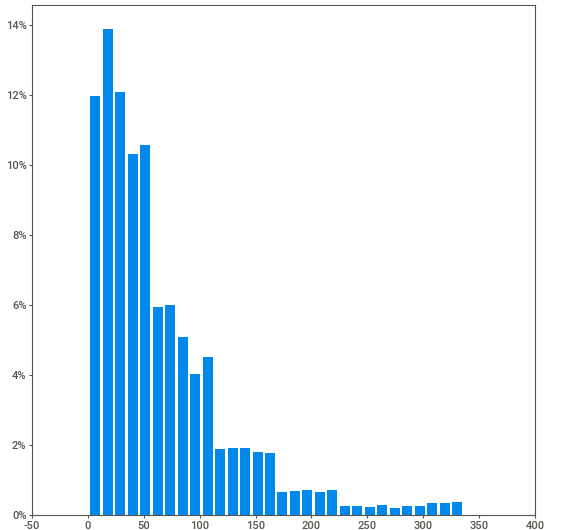
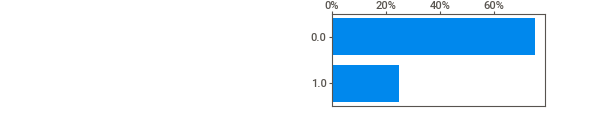
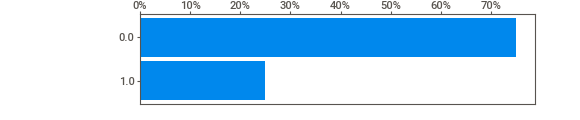
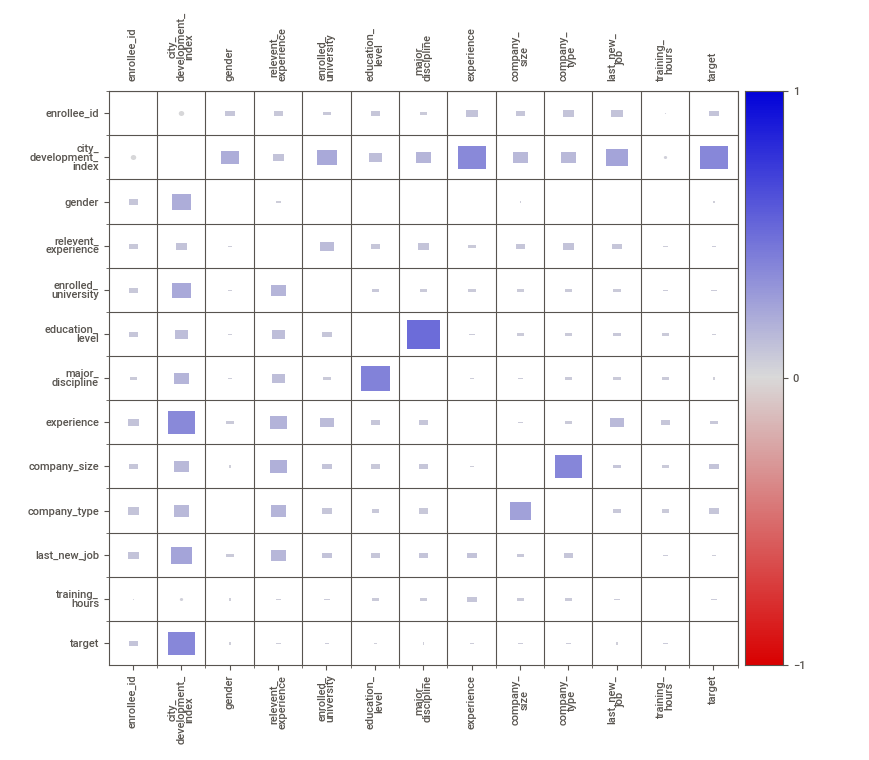
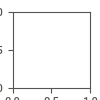

In [5]:
report_ztrain.show_notebook()


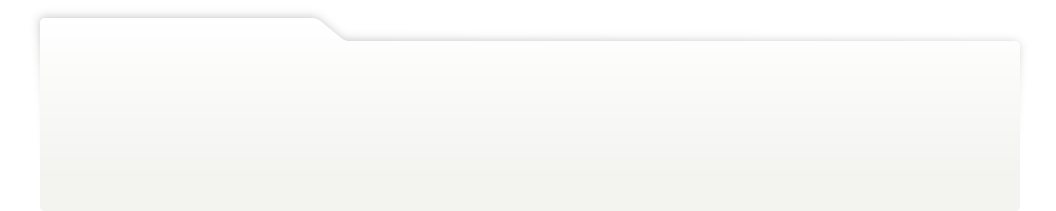
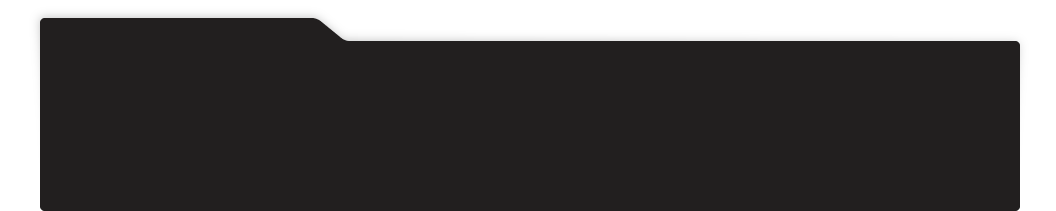
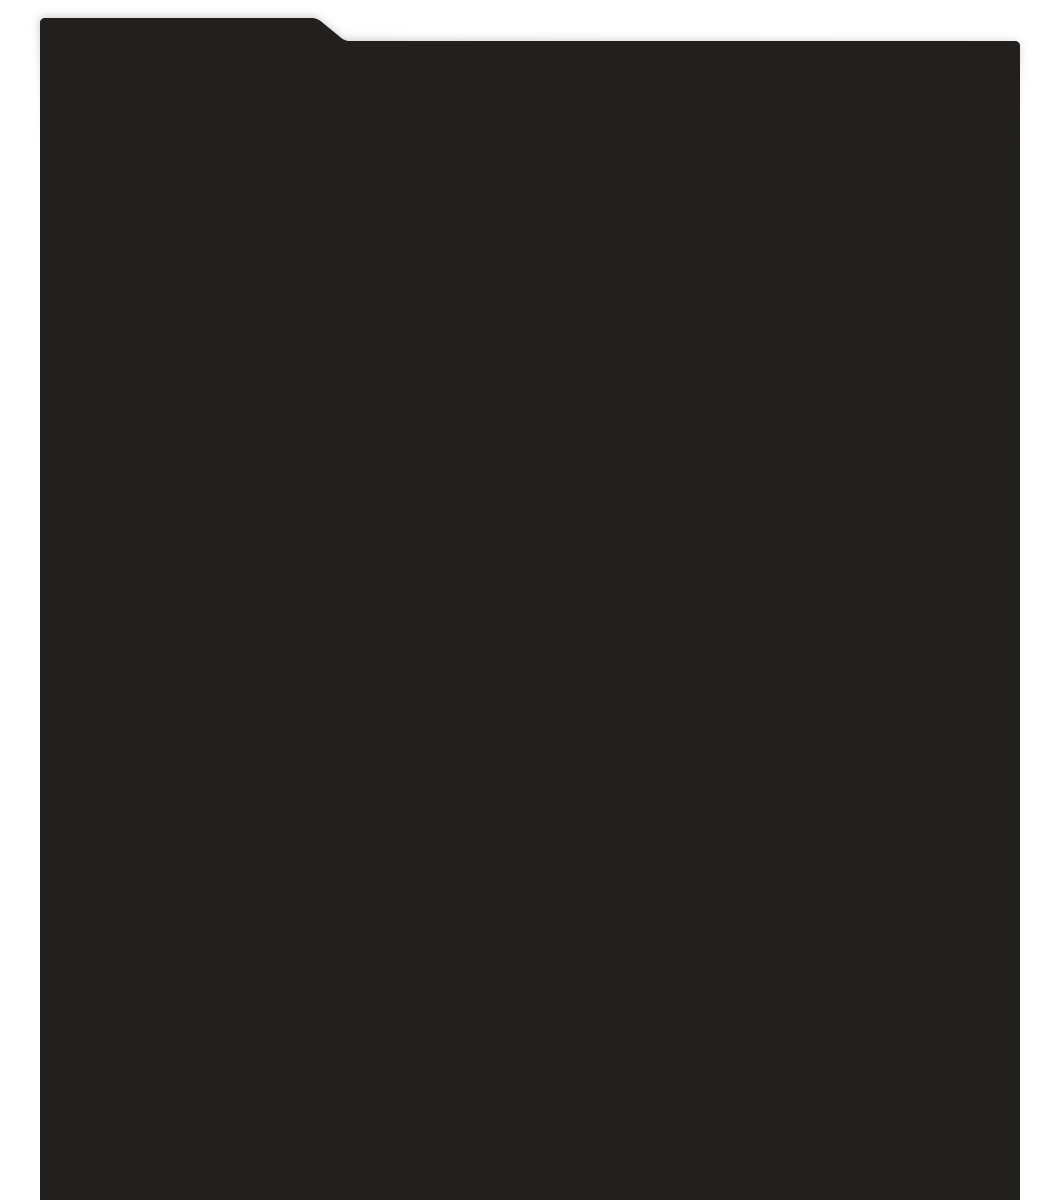
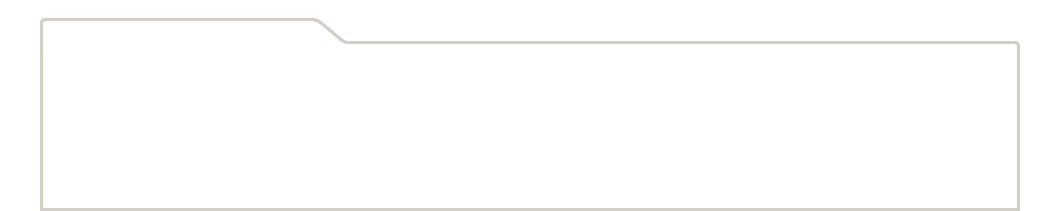
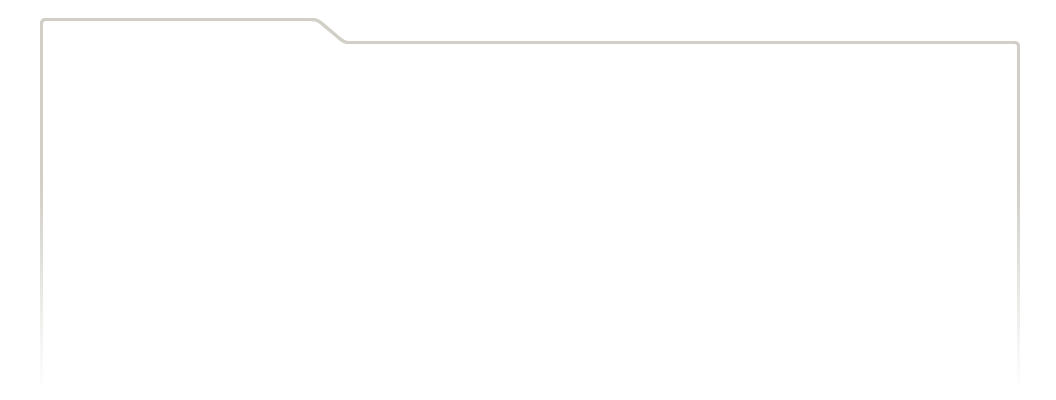
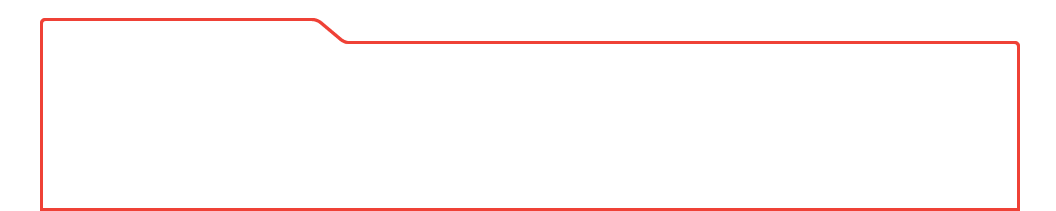
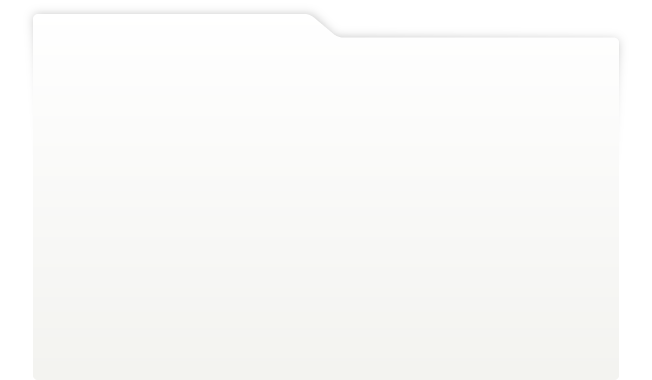
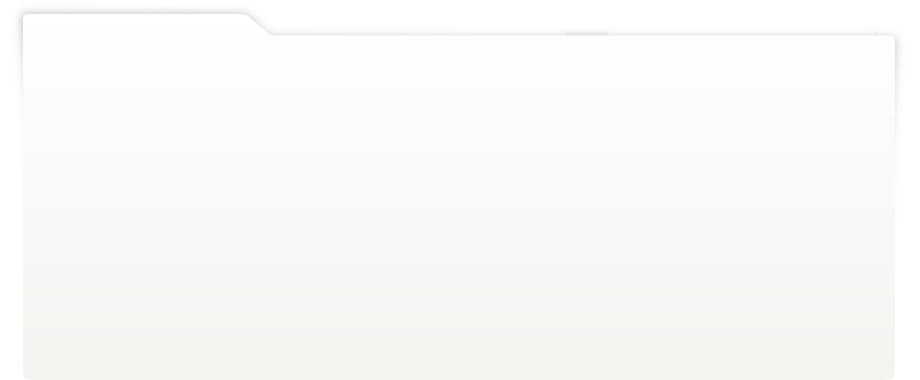
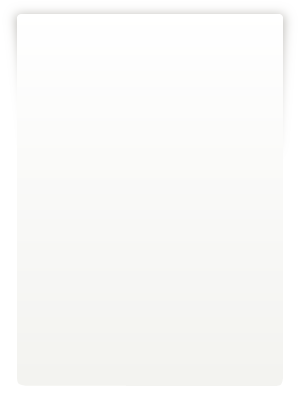
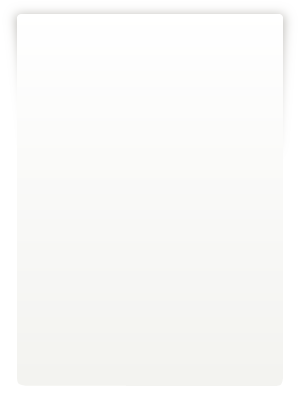
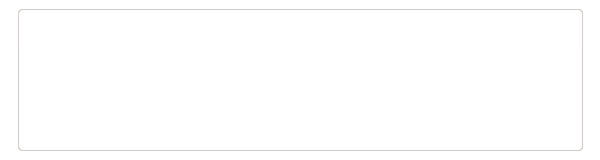
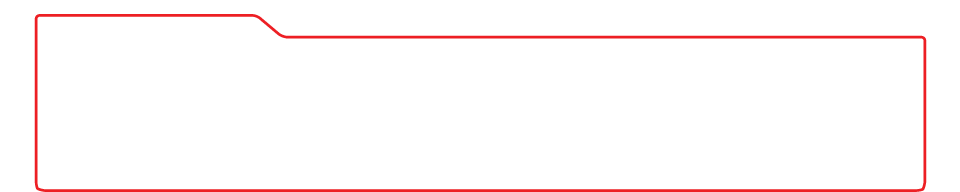
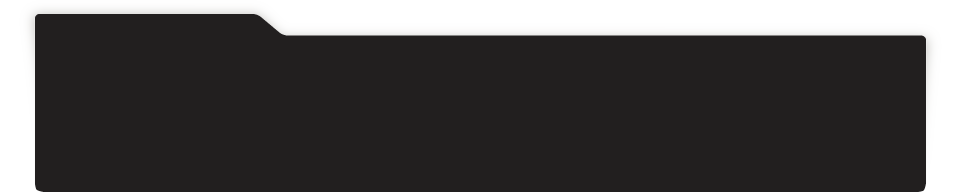
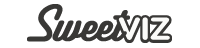
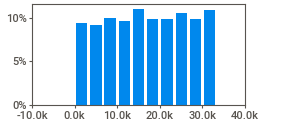
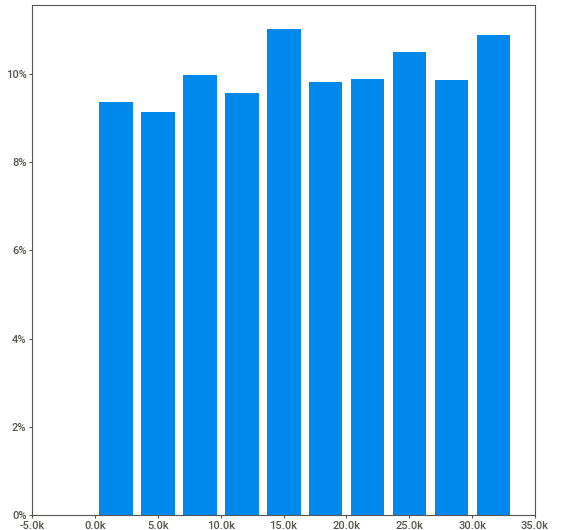
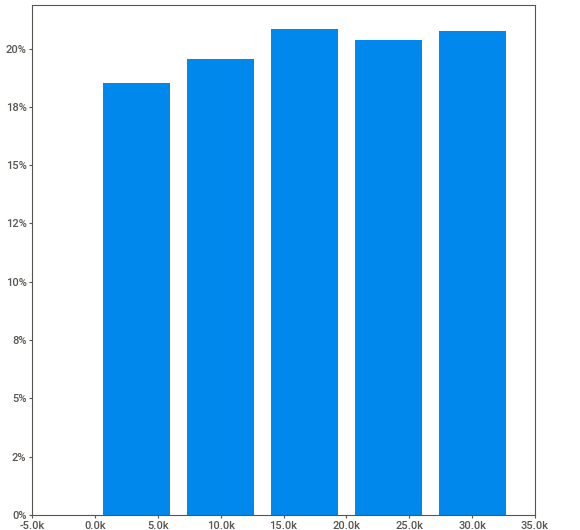
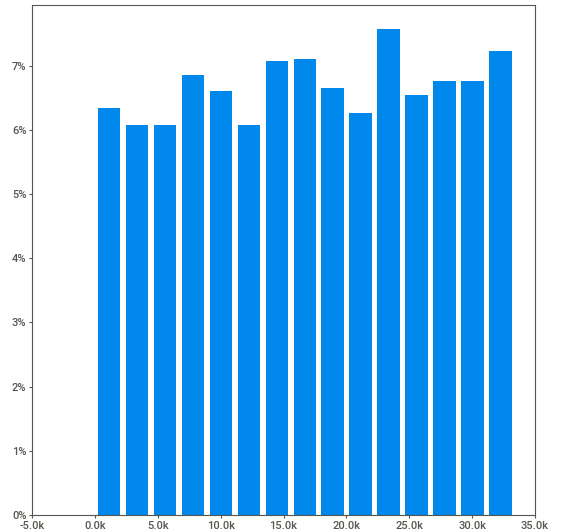
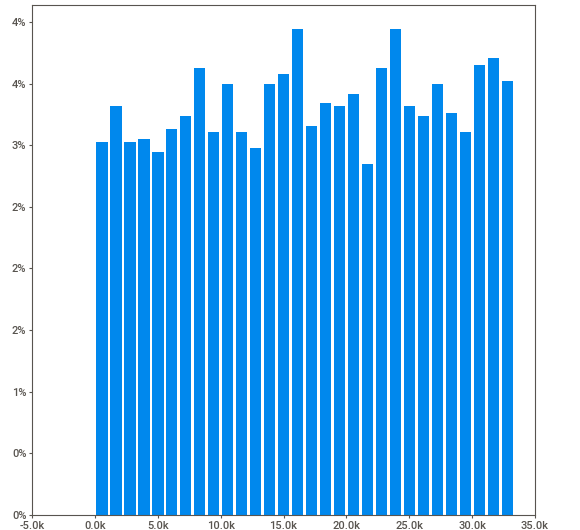
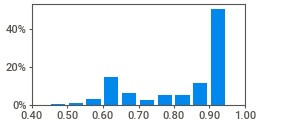
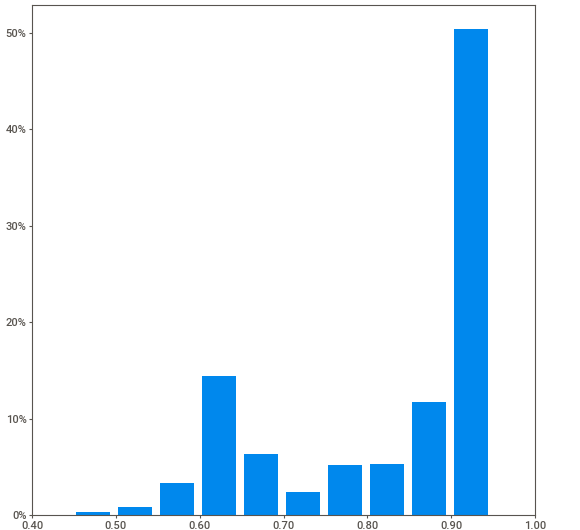
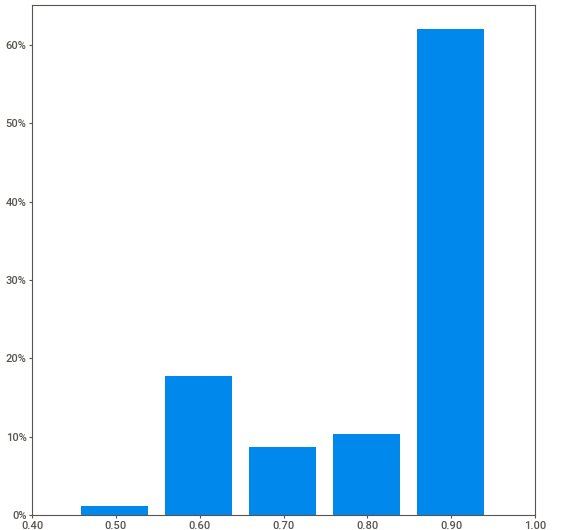
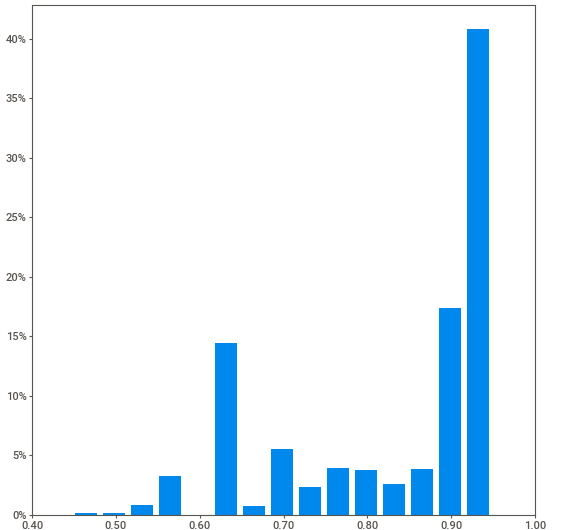
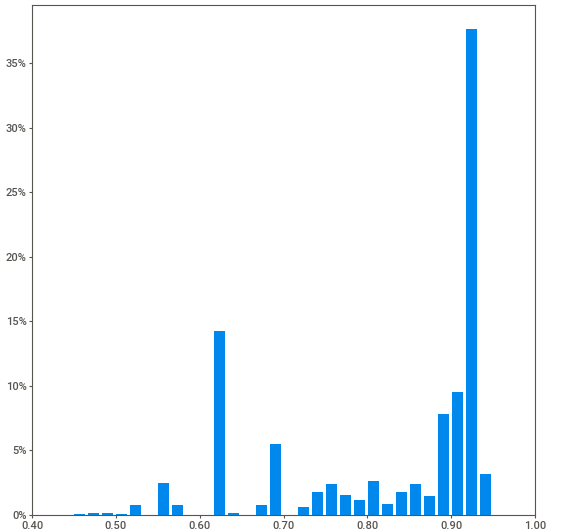
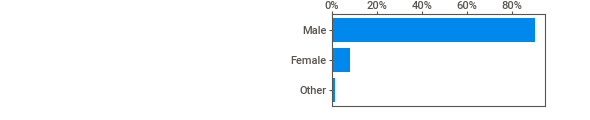
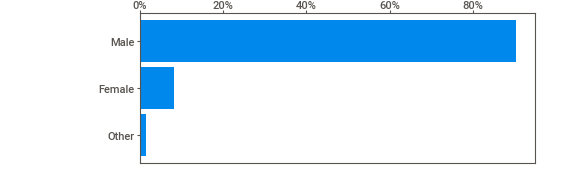
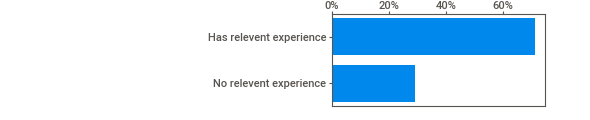
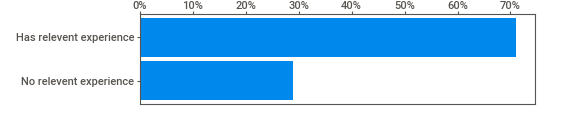
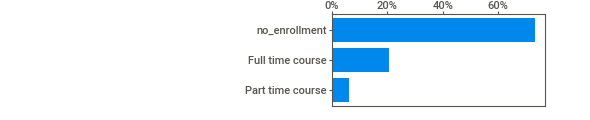
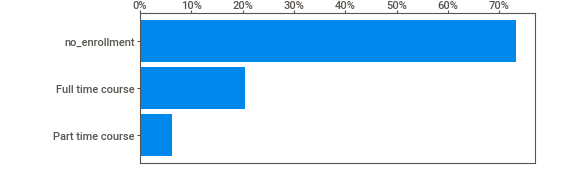
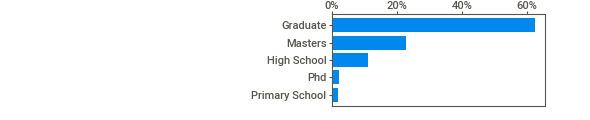
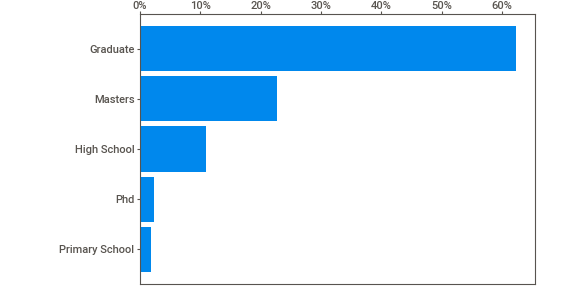
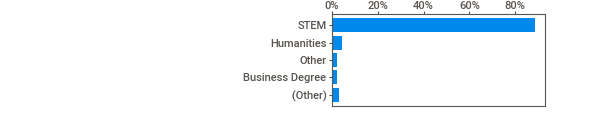
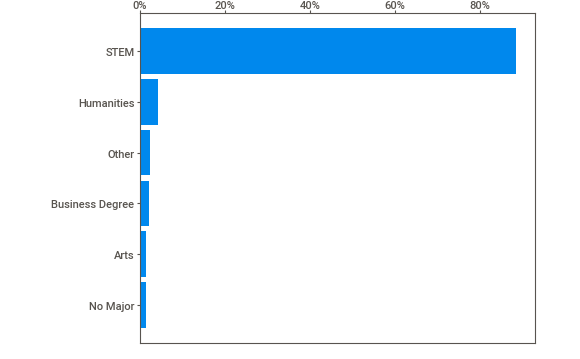
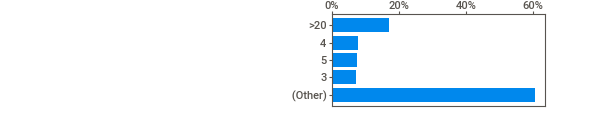
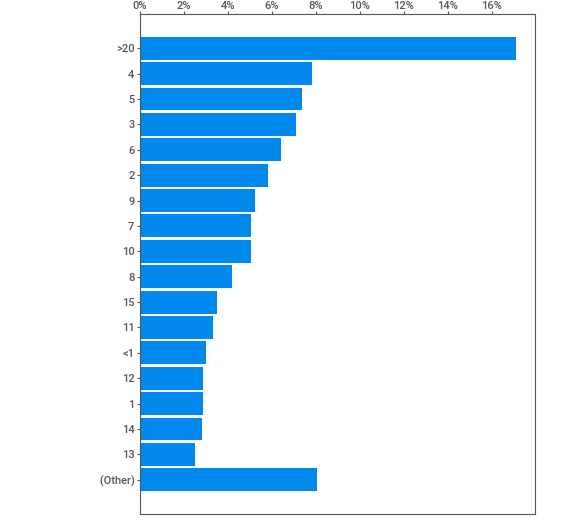
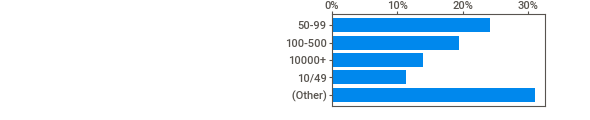
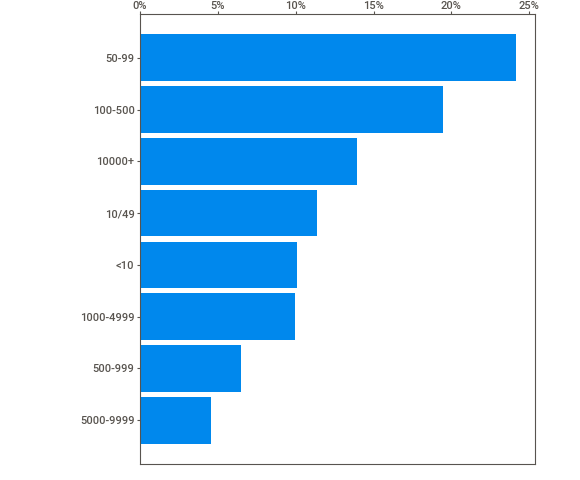
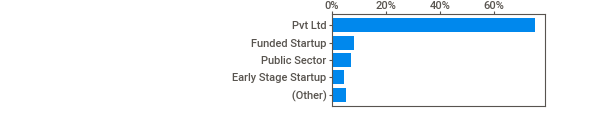
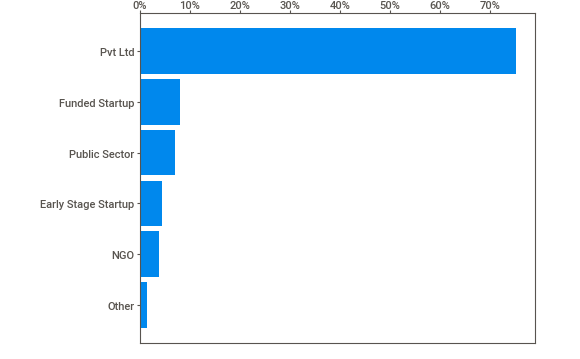
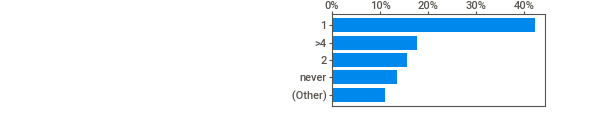
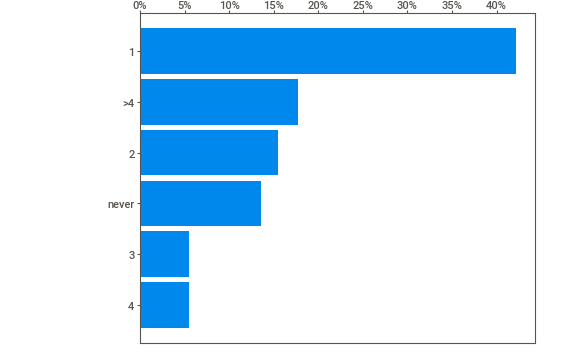
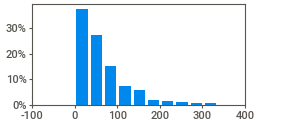
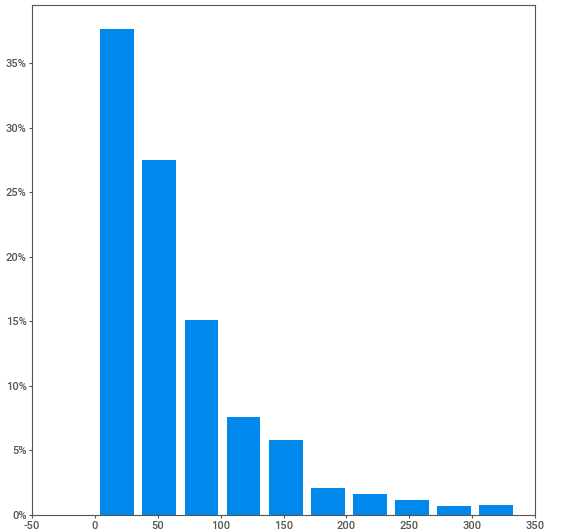
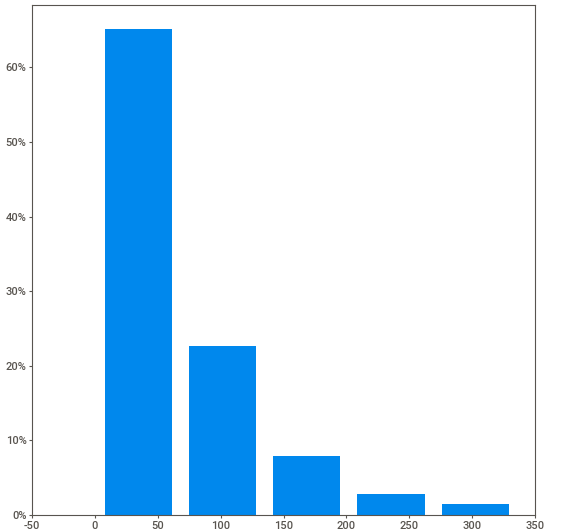
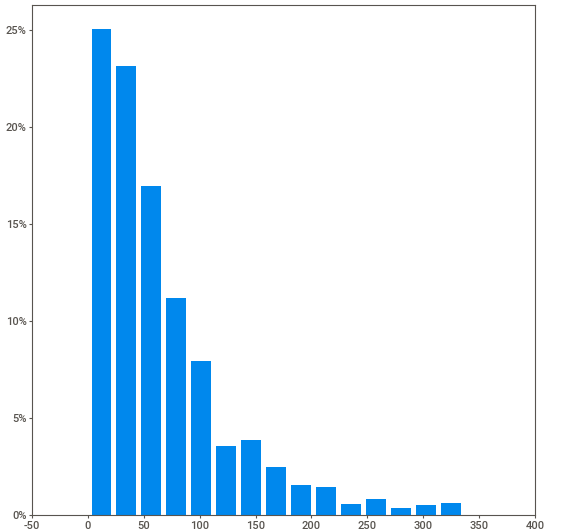
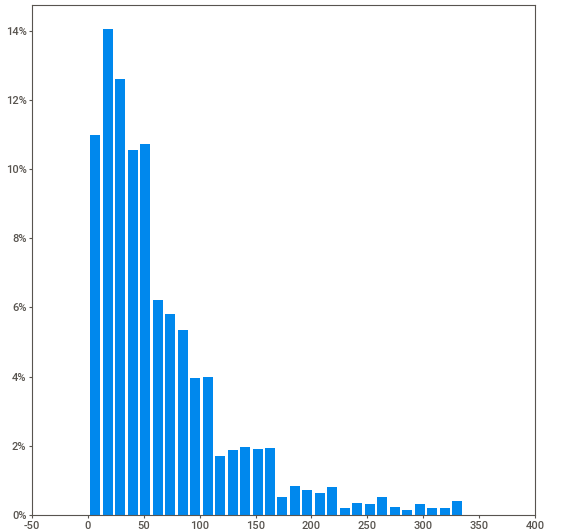
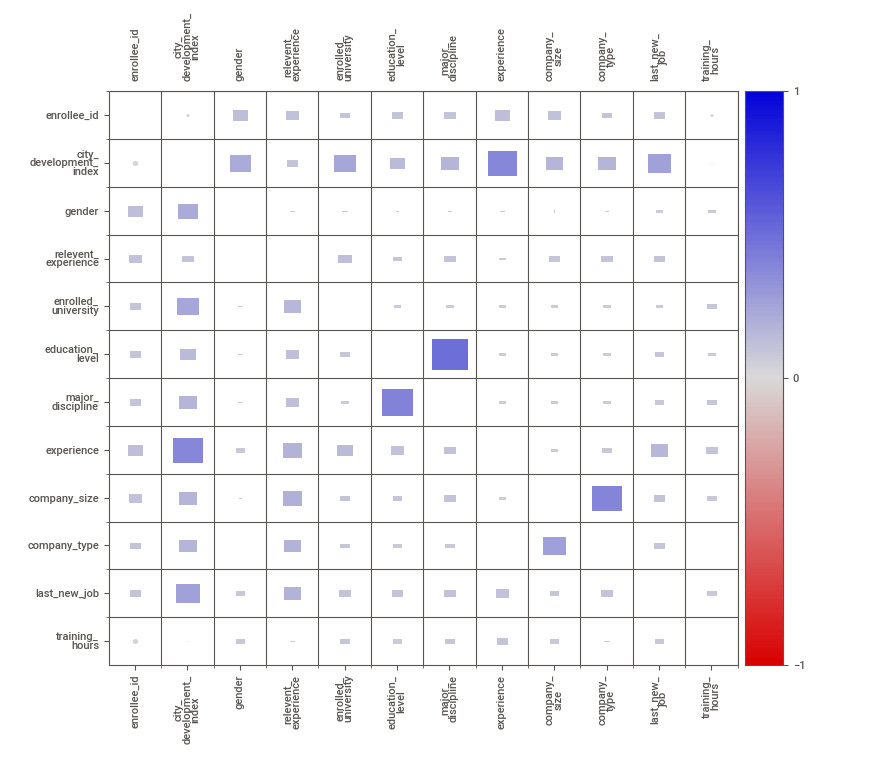
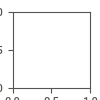

In [6]:
report_ztest.show_notebook()

In [7]:
z_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0


In [8]:
z_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23603,city_160,0.920,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,78
1,22499,city_45,0.890,NaN,Has relevent experience,Full time course,High School,NaN,6,50-99,Pvt Ltd,1,36
2,10465,city_149,0.689,Male,No relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,never,34
3,8293,city_67,0.855,Female,Has relevent experience,no_enrollment,Masters,STEM,9,1000-4999,Pvt Ltd,1,149
4,4246,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Funded Startup,2,7


In [9]:
z_train.shape

(15326, 14)

In [10]:
z_test.shape

(3832, 13)

In [11]:
z_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11725 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15024 non-null  object 
 6   education_level         14957 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15276 non-null  object 
 9   company_size            10592 non-null  object 
 10  company_type            10435 non-null  object 
 11  last_new_job            14987 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [12]:
z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             3832 non-null   int64  
 1   city                    3832 non-null   object 
 2   city_development_index  3832 non-null   float64
 3   gender                  2925 non-null   object 
 4   relevent_experience     3832 non-null   object 
 5   enrolled_university     3748 non-null   object 
 6   education_level         3741 non-null   object 
 7   major_discipline        3256 non-null   object 
 8   experience              3817 non-null   object 
 9   company_size            2628 non-null   object 
 10  company_type            2583 non-null   object 
 11  last_new_job            3748 non-null   object 
 12  training_hours          3832 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 389.3+ KB


In [13]:
z_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,15326.000000,15326.000000,15326.000000,15326.000000
mean,16838.278807,0.829929,65.279068,0.249511
std,9625.018286,0.122668,60.079482,0.432744
min,1.000000,0.448000,1.000000,0.000000
25%,8482.250000,0.743000,23.000000,0.000000
50%,16977.000000,0.910000,47.000000,0.000000
75%,25144.000000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [14]:
z_test.describe()

,enrollee_id,city_development_index,training_hours
count,3832.000000,3832.000000,3832.000000
mean,17023.656315,0.824523,65.718163
std,9581.132710,0.126021,59.980867
min,10.000000,0.448000,1.000000
25%,8791.250000,0.698000,23.000000
50%,17043.000000,0.899000,48.000000
75%,25285.750000,0.920000,88.000000
max,33362.000000,0.949000,336.000000


In [15]:
z_train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,15326.0,16838.278807,9625.018286,1.000,8482.250,16977.00,25144.00,33380.000
city_development_index,15326.0,0.829929,0.122668,0.448,0.743,0.91,0.92,0.949
training_hours,15326.0,65.279068,60.079482,1.000,23.000,47.00,89.00,336.000
target,15326.0,0.249511,0.432744,0.000,0.000,0.00,0.00,1.000


In [16]:
z_test.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,3832.0,17023.656315,9581.132710,10.000,8791.250,17043.000,25285.75,33362.000
city_development_index,3832.0,0.824523,0.126021,0.448,0.698,0.899,0.92,0.949
training_hours,3832.0,65.718163,59.980867,1.000,23.000,48.000,88.00,336.000


In [17]:
z_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [18]:
z_test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [19]:
missing_values_z_train = z_train[z_train.isnull().any(axis=1)]

In [20]:
missing_values_z_train.shape

(8144, 14)

In [21]:
missing_values_z_test = z_test[z_test.isnull().any(axis=1)]

In [22]:
missing_values_z_test.shape

(2059, 13)

In [23]:
missing_values_z_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
5,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0


In [24]:
missing_values_z_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23603,city_160,0.920,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,78
1,22499,city_45,0.890,NaN,Has relevent experience,Full time course,High School,NaN,6,50-99,Pvt Ltd,1,36
2,10465,city_149,0.689,Male,No relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,never,34
5,29306,city_159,0.843,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,NaN,2,14
6,23118,city_128,0.527,Male,No relevent experience,Full time course,High School,NaN,<1,NaN,NaN,never,2


In [25]:
print(z_train.shape)
print(missing_values_z_train.shape)

(15326, 14)
(8144, 14)


In [26]:
print(z_test.shape)
print(missing_values_z_test.shape)

(3832, 13)
(2059, 13)


In [27]:
print(f'Ratio of missing rows to total rows: {round(len(missing_values_z_train)/len(z_train),4)*100}%')

Ratio of missing rows to total rows: 53.14%


In [28]:
print(f'Ratio of missing rows to total rows: {round(len(missing_values_z_test)/len(z_test),4)*100}%')

Ratio of missing rows to total rows: 53.73%


In [29]:
z_train.isna().sum().sort_values(ascending = False)

company_type              4891
company_size              4734
gender                    3601
major_discipline          2237
education_level            369
last_new_job               339
enrolled_university        302
experience                  50
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [30]:
z_test.isna().sum().sort_values(ascending = False)

company_type              1249
company_size              1204
gender                     907
major_discipline           576
education_level             91
enrolled_university         84
last_new_job                84
experience                  15
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
dtype: int64

### Limpieza de la infomación

In [31]:
z_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [32]:
z_test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

###### Columna company_type

In [33]:
z_train['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'NGO', 'Other'], dtype=object)

In [34]:
z_test['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Public Sector', 'NGO',
       'Early Stage Startup', 'Other'], dtype=object)

In [35]:
z_train['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [36]:
z_test['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [37]:
z_train['company_type'].fillna(value='Pvt Ltd',inplace=True)

In [38]:
z_test['company_type'].fillna(value='Pvt Ltd',inplace=True)

In [39]:
z_train['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'NGO', 'Other'], dtype=object)

In [40]:
z_test['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', 'NGO',
       'Early Stage Startup', 'Other'], dtype=object)

In [41]:
#hr['company_type'] = hr['company_type'].astype(str, errors = 'raise')

###### Columna compant_size

In [42]:
z_train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [43]:
z_test['company_size'].unique()

array([nan, '50-99', '1000-4999', '<10', '10/49', '10000+', '100-500',
       '500-999', '5000-9999'], dtype=object)

In [44]:
z_train['company_size']= z_train['company_size'].str.replace('+', '')

In [45]:
z_test['company_size']= z_test['company_size'].str.replace('+', '')

In [46]:
z_train['company_size'].unique()

array([nan, '50-99', '<10', '10000', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [47]:
z_test['company_size'].unique()

array([nan, '50-99', '1000-4999', '<10', '10/49', '10000', '100-500',
       '500-999', '5000-9999'], dtype=object)

In [48]:
z_train['company_size']= z_train['company_size'].str.replace('<', '')

In [49]:
z_test['company_size']= z_test['company_size'].str.replace('<', '')

In [50]:
z_train['company_size'].unique()

array([nan, '50-99', '10', '10000', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [51]:
z_test['company_size'].unique()

array([nan, '50-99', '1000-4999', '10', '10/49', '10000', '100-500',
       '500-999', '5000-9999'], dtype=object)

In [52]:
z_train['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [53]:
z_test['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [54]:
z_train['company_size'].fillna(value='50-99',inplace=True)

In [55]:
z_test['company_size'].fillna(value='50-99',inplace=True)

In [56]:
z_train['company_size'].unique()

array(['50-99', '10', '10000', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [57]:
z_test['company_size'].unique()

array(['50-99', '1000-4999', '10', '10/49', '10000', '100-500', '500-999',
       '5000-9999'], dtype=object)

In [58]:
z_train['company_size']= z_train['company_size'].str.replace('50-99', '100')

In [59]:
z_test['company_size']= z_test['company_size'].str.replace('50-99', '100')

In [60]:
z_train['company_size']= z_train['company_size'].str.replace('100-500', '500')

In [61]:
z_test['company_size']= z_test['company_size'].str.replace('100-500', '500')

In [62]:
z_train['company_size']= z_train['company_size'].str.replace('500-999', '1000')

In [63]:
z_test['company_size']= z_test['company_size'].str.replace('500-999', '1000')

In [64]:
z_train['company_size']= z_train['company_size'].str.replace('5000-9999', '10000')

In [65]:
z_test['company_size']=z_test ['company_size'].str.replace('5000-9999', '10000')

In [66]:
z_train['company_size']= z_train['company_size'].str.replace('1000-4999', '5000')

In [67]:
z_test['company_size']= z_test['company_size'].str.replace('1000-4999', '5000')

In [68]:
z_train['company_size']= z_train['company_size'].str.replace('10/49', '50')

In [69]:
z_test['company_size']= z_test['company_size'].str.replace('10/49', '50')

In [70]:
z_train['company_size'].unique()

array(['100', '10', '10000', '5000', '50', '500', '1000'], dtype=object)

In [71]:
z_test['company_size'].unique()

array(['100', '5000', '10', '50', '10000', '500', '1000'], dtype=object)

In [72]:
z_train['company_size'] =z_train['company_size'].astype(float, errors = 'raise')

In [73]:
z_test['company_size'] =z_test['company_size'].astype(float, errors = 'raise')

###### Columna gender

In [74]:
z_train['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [75]:
z_test['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [76]:
z_train['gender'].mode()

0    Male
Name: gender, dtype: object

In [77]:
z_test['gender'].mode()

0    Male
Name: gender, dtype: object

In [78]:
z_train['gender'].fillna(value='Male',inplace=True)

In [79]:
z_test['gender'].fillna(value='Male',inplace=True)

In [80]:
z_train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [81]:
z_test['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

###### Columna major_discipline

In [82]:
z_train['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Humanities', 'Arts', 'No Major',
       'Other'], dtype=object)

In [83]:
z_test['major_discipline'].unique()

array(['STEM', nan, 'Arts', 'Business Degree', 'Humanities', 'Other',
       'No Major'], dtype=object)

In [84]:
z_train['major_discipline'].mode()

0    STEM
Name: major_discipline, dtype: object

In [85]:
z_test['major_discipline'].mode()

0    STEM
Name: major_discipline, dtype: object

In [86]:
z_train['major_discipline'].fillna(value='STEM',inplace=True)

In [87]:
z_test['major_discipline'].fillna(value='STEM',inplace=True)

In [88]:
z_train['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Humanities', 'Arts', 'No Major',
       'Other'], dtype=object)

In [89]:
z_test['major_discipline'].unique()

array(['STEM', 'Arts', 'Business Degree', 'Humanities', 'Other',
       'No Major'], dtype=object)

###### Columna education_level

In [90]:
z_train['education_level'].unique()

array(['Graduate', 'High School', nan, 'Masters', 'Phd', 'Primary School'],
      dtype=object)

In [91]:
z_test['education_level'].unique()

array(['Graduate', 'High School', 'Masters', nan, 'Primary School', 'Phd'],
      dtype=object)

In [92]:
z_train['education_level'].mode()

0    Graduate
Name: education_level, dtype: object

In [93]:
z_test['education_level'].mode()

0    Graduate
Name: education_level, dtype: object

In [94]:
z_train['education_level'].fillna(value='Graduate',inplace=True)

In [95]:
z_test['education_level'].fillna(value='Graduate',inplace=True)

In [96]:
z_train['education_level'].unique()

array(['Graduate', 'High School', 'Masters', 'Phd', 'Primary School'],
      dtype=object)

In [97]:
z_test['education_level'].unique()

array(['Graduate', 'High School', 'Masters', 'Primary School', 'Phd'],
      dtype=object)

###### Columna last_new_job

In [98]:
z_train['last_new_job'].unique()

array(['1', '>4', 'never', '3', '2', '4', nan], dtype=object)

In [99]:
z_test['last_new_job'].unique()

array(['1', 'never', '2', '>4', nan, '3', '4'], dtype=object)

In [100]:
z_train['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [101]:
z_test['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [102]:
z_train['last_new_job'].fillna(value='1',inplace=True)

In [103]:
z_test['last_new_job'].fillna(value='1',inplace=True)

In [104]:
z_train['last_new_job'].unique()

array(['1', '>4', 'never', '3', '2', '4'], dtype=object)

In [105]:
z_test['last_new_job'].unique()

array(['1', 'never', '2', '>4', '3', '4'], dtype=object)

In [106]:
z_train['last_new_job']= z_train['last_new_job'].str.replace('>4', '5')

In [107]:
z_test['last_new_job']= z_test['last_new_job'].str.replace('>4', '5')

In [108]:
z_train['last_new_job']= z_train['last_new_job'].str.replace('never', '0')

In [109]:
z_test['last_new_job']= z_test['last_new_job'].str.replace('never', '0')

In [110]:
z_train['last_new_job'] =z_train['last_new_job'].astype(float, errors = 'raise')

In [111]:
z_test['last_new_job'] =z_test['last_new_job'].astype(float, errors = 'raise')

In [112]:
z_train['last_new_job'].unique()

array([1., 5., 0., 3., 2., 4.])

In [113]:
z_test['last_new_job'].unique()

array([1., 0., 2., 5., 3., 4.])

###### Columna enrolled_university

In [114]:
z_train['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [115]:
z_test['enrolled_university'].unique()

array(['Full time course', 'no_enrollment', nan, 'Part time course'],
      dtype=object)

In [116]:
z_train['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: object

In [117]:
z_test['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: object

In [118]:
z_train['enrolled_university'].fillna(value='no_enrollment',inplace=True)

In [119]:
z_test['enrolled_university'].fillna(value='no_enrollment',inplace=True)

In [120]:
z_train['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [121]:
z_test['enrolled_university'].unique()

array(['Full time course', 'no_enrollment', 'Part time course'],
      dtype=object)

In [122]:
z_train['enrolled_university']= z_train['enrolled_university'].str.replace('no_enrollment', 'No Enrollment')

In [123]:
z_test['enrolled_university']= z_test['enrolled_university'].str.replace('no_enrollment', 'No Enrollment')

In [124]:
z_train['enrolled_university'].unique()

array(['No Enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [125]:
z_test['enrolled_university'].unique()

array(['Full time course', 'No Enrollment', 'Part time course'],
      dtype=object)

###### Columna experience

In [126]:
z_train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1',
       '10', '4', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [127]:
z_test['experience'].unique()

array(['5', '6', '9', '16', '14', '<1', '>20', '3', '2', '8', '10', '4',
       '12', '17', '7', '1', '18', '11', '20', '15', '19', '13', nan],
      dtype=object)

In [128]:
z_train['experience'].mode()

0    >20
Name: experience, dtype: object

In [129]:
z_test['experience'].mode()

0    >20
Name: experience, dtype: object

In [130]:
z_train['experience'].fillna(value='>20',inplace=True)

In [131]:
z_test['experience'].fillna(value='>20',inplace=True)

In [132]:
z_train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1',
       '10', '4', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [133]:
z_test['experience'].unique()

array(['5', '6', '9', '16', '14', '<1', '>20', '3', '2', '8', '10', '4',
       '12', '17', '7', '1', '18', '11', '20', '15', '19', '13'],
      dtype=object)

In [134]:
z_train['experience']= z_train['experience'].str.replace('>20', '21')

In [135]:
z_test['experience']= z_test['experience'].str.replace('>20', '21')

In [136]:
z_train['experience']= z_train['experience'].str.replace('<1', '0')

In [137]:
z_test['experience']= z_test['experience'].str.replace('<1', '0')

In [138]:
z_train['experience'].unique()

array(['21', '15', '5', '0', '11', '13', '7', '17', '2', '16', '1', '10',
       '4', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [139]:
z_test['experience'].unique()

array(['5', '6', '9', '16', '14', '0', '21', '3', '2', '8', '10', '4',
       '12', '17', '7', '1', '18', '11', '20', '15', '19', '13'],
      dtype=object)

In [140]:
z_train['experience'] = z_train['experience'].astype(float, errors = 'raise')

In [141]:
z_test['experience'] = z_test['experience'].astype(float, errors = 'raise')

In [142]:
z_train['experience'].unique()

array([21., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1., 10.,  4.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., 20.])

In [143]:
z_test['experience'].unique()

array([ 5.,  6.,  9., 16., 14.,  0., 21.,  3.,  2.,  8., 10.,  4., 12.,
       17.,  7.,  1., 18., 11., 20., 15., 19., 13.])

### Análisis de la Información despúes de hacer la limpieza

In [144]:
z_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  15326 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15326 non-null  object 
 6   education_level         15326 non-null  object 
 7   major_discipline        15326 non-null  object 
 8   experience              15326 non-null  float64
 9   company_size            15326 non-null  float64
 10  company_type            15326 non-null  object 
 11  last_new_job            15326 non-null  float64
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(5), int64(2), object(7)
mem

In [145]:
z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             3832 non-null   int64  
 1   city                    3832 non-null   object 
 2   city_development_index  3832 non-null   float64
 3   gender                  3832 non-null   object 
 4   relevent_experience     3832 non-null   object 
 5   enrolled_university     3832 non-null   object 
 6   education_level         3832 non-null   object 
 7   major_discipline        3832 non-null   object 
 8   experience              3832 non-null   float64
 9   company_size            3832 non-null   float64
 10  company_type            3832 non-null   object 
 11  last_new_job            3832 non-null   float64
 12  training_hours          3832 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 389.3+ KB


In [146]:
z_train.describe()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
count,15326.000000,15326.000000,15326.000000,15326.000000,15326.000000,15326.000000,15326.000000
mean,16838.278807,0.829929,10.147266,1880.058724,1.977554,65.279068,0.249511
std,9625.018286,0.122668,6.790054,3459.153480,1.661782,60.079482,0.432744
min,1.000000,0.448000,0.000000,10.000000,0.000000,1.000000,0.000000
25%,8482.250000,0.743000,4.000000,100.000000,1.000000,23.000000,0.000000
50%,16977.000000,0.910000,9.000000,100.000000,1.000000,47.000000,0.000000
75%,25144.000000,0.920000,16.000000,1000.000000,3.000000,89.000000,0.000000
max,33380.000000,0.949000,21.000000,10000.000000,5.000000,336.000000,1.000000


In [147]:
z_test.describe()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000
mean,17023.656315,0.824523,10.096555,1773.864823,1.981472,65.718163
std,9581.132710,0.126021,6.816196,3366.168378,1.670579,59.980867
min,10.000000,0.448000,0.000000,10.000000,0.000000,1.000000
25%,8791.250000,0.698000,4.000000,100.000000,1.000000,23.000000
50%,17043.000000,0.899000,9.000000,100.000000,1.000000,48.000000
75%,25285.750000,0.920000,16.000000,500.000000,3.000000,88.000000
max,33362.000000,0.949000,21.000000,10000.000000,5.000000,336.000000


In [148]:
z_train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,15326.0,16838.278807,9625.018286,1.000,8482.250,16977.00,25144.00,33380.000
city_development_index,15326.0,0.829929,0.122668,0.448,0.743,0.91,0.92,0.949
experience,15326.0,10.147266,6.790054,0.000,4.000,9.00,16.00,21.000
company_size,15326.0,1880.058724,3459.153480,10.000,100.000,100.00,1000.00,10000.000
last_new_job,15326.0,1.977554,1.661782,0.000,1.000,1.00,3.00,5.000
training_hours,15326.0,65.279068,60.079482,1.000,23.000,47.00,89.00,336.000
target,15326.0,0.249511,0.432744,0.000,0.000,0.00,0.00,1.000


In [149]:
z_test.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,3832.0,17023.656315,9581.132710,10.000,8791.250,17043.000,25285.75,33362.000
city_development_index,3832.0,0.824523,0.126021,0.448,0.698,0.899,0.92,0.949
experience,3832.0,10.096555,6.816196,0.000,4.000,9.000,16.00,21.000
company_size,3832.0,1773.864823,3366.168378,10.000,100.000,100.000,500.00,10000.000
last_new_job,3832.0,1.981472,1.670579,0.000,1.000,1.000,3.00,5.000
training_hours,3832.0,65.718163,59.980867,1.000,23.000,48.000,88.00,336.000


In [150]:
corr=z_train.corr()
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

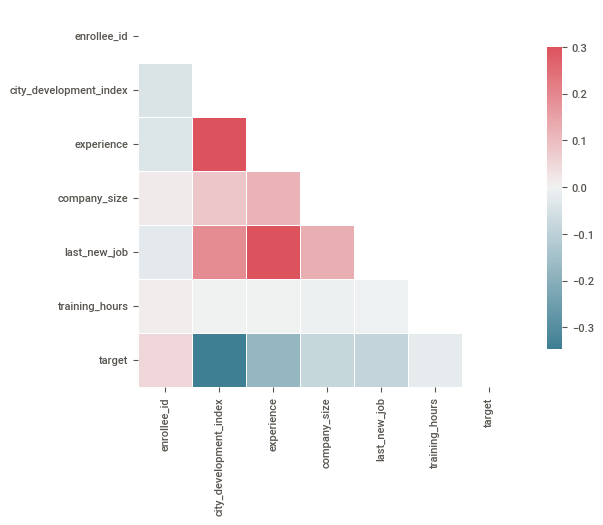

In [151]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.8})

In [152]:
corr=z_test.corr()
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

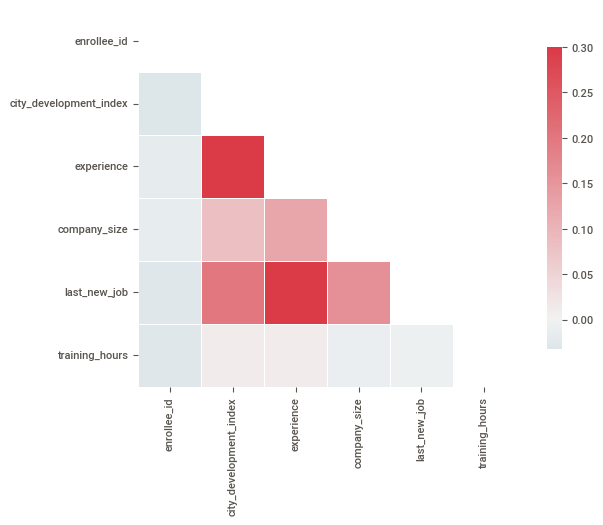

In [153]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.8})

##### Con ayuda del heatmap se observa que hay una correlación alta entre la experiencia y el el último puesto de trabajo.
##### La correlación entre el nivel de desarrollo de la ciudad y la experiencia también es resaltable.

<AxesSubplot:xlabel='last_new_job', ylabel='experience'>

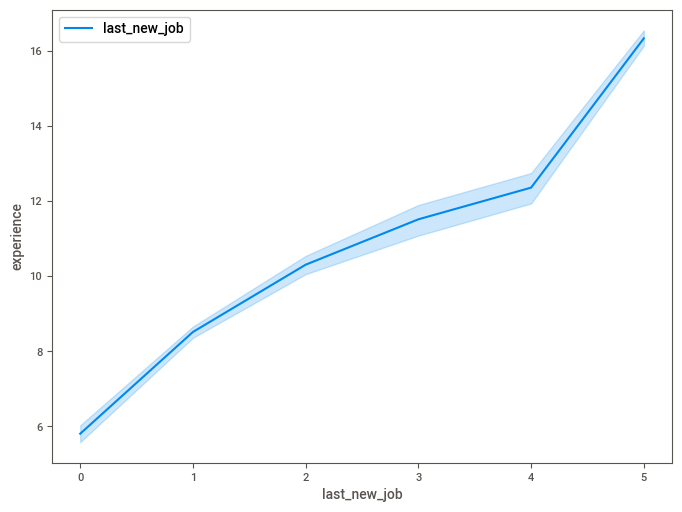

In [154]:
fig,ax=plt.subplots(1,figsize=(8,6))
sns.lineplot(x = z_train['last_new_job'],y = z_train['experience'],label ='last_new_job')


<AxesSubplot:xlabel='last_new_job', ylabel='experience'>

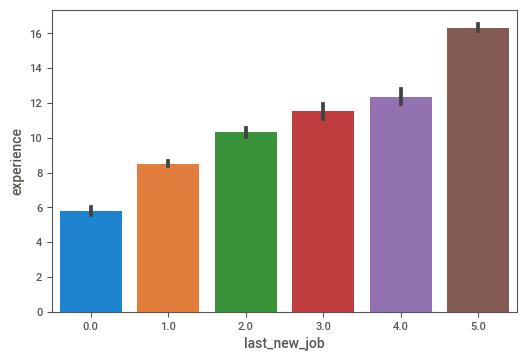

In [155]:
sns.barplot(x = z_train['last_new_job'],y = z_train['experience'])

##### La experiencia aumenta entre más tiempo se permanezca en un trabajo 

<AxesSubplot:xlabel='city_development_index', ylabel='experience'>

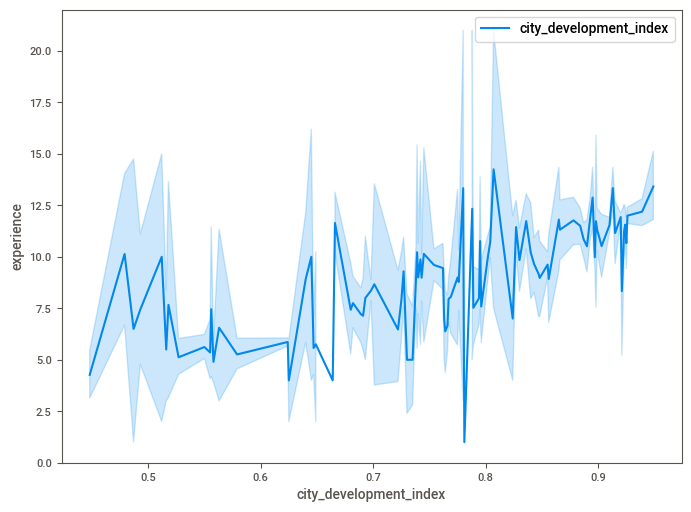

In [156]:
fig,ax=plt.subplots(1,figsize=(8,6))
sns.lineplot(x = z_train['city_development_index'],y = z_train['experience'],label ='city_development_index')

##### De acuerdo a la gráfica entre mayor sea el indice de desarrollo de la ciudad la experiencia aumente, esto a su vez esta ligado
##### por el tiempo que se permanece en un trabajo que ayudaa desarrollar experiencia

In [157]:
z_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,21.0,100.0,Pvt Ltd,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,No Enrollment,Graduate,STEM,15.0,100.0,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,100.0,Pvt Ltd,0.0,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,No Enrollment,Graduate,Business Degree,0.0,100.0,Pvt Ltd,0.0,52,1.0
4,21651,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11.0,100.0,Pvt Ltd,1.0,24,1.0


In [158]:
z_train['target'].value_counts()

0.0    11502
1.0     3824
Name: target, dtype: int64

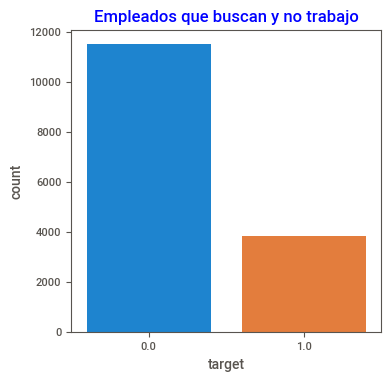

In [159]:
plt.figure(figsize=(4,4))
sns.countplot(x=z_train["target"],  data = z_train)
plt.title("Empleados que buscan y no trabajo", color = "blue")
plt.show()

##### El target se asume como el empleado que está buscando o no trabajo. El valor 0 es para los que no buscan cambiar de trabajo y el valor 1 para los que buscan cambiar de trabajo.

##### 25% empleados son los que no están buscando un cambio de trabajo, considero que es un número alto ya que es una cuarta parte del total.

##### Se analiazan cuáles son los ciudades con mayor presencia de empleado y por lo mismo de desarrollo

In [160]:
z_train['city'].value_counts()

city_103    3497
city_21     2156
city_16     1259
city_114    1067
city_160     670
            ... 
city_129       2
city_8         2
city_140       1
city_171       1
city_121       1
Name: city, Length: 123, dtype: int64

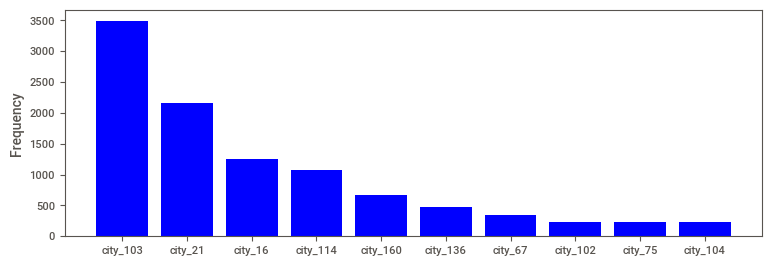

In [161]:
hr_city = pd.DataFrame(z_train['city'].value_counts())
city_col = hr_city['city'][:10]
city_index = hr_city.index[:10]

import matplotlib.pyplot as plt
plt.figure(figsize=(9,3))
plt.bar(city_index, city_col, color="blue")
plt.ylabel("Frequency")
plt.show()

##### Se analizan como se presentan los mayores índices de desarrollo de las ciudades

In [162]:
z_train['city_development_index'].value_counts()

0.920    4167
0.624    2156
0.910    1259
0.926    1067
0.698     536
         ... 
0.824       3
0.780       3
0.625       2
0.664       1
0.781       1
Name: city_development_index, Length: 93, dtype: int64

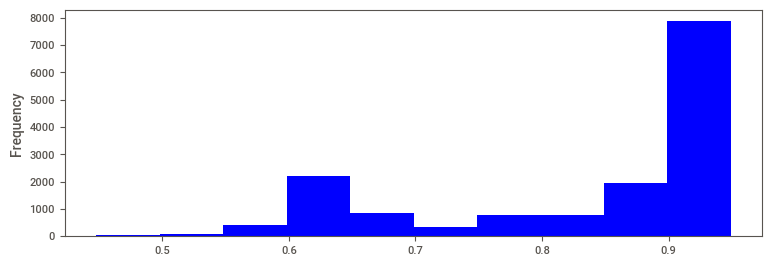

In [163]:
plt.figure(figsize=(9,3))
plt.hist(z_train["city_development_index"], color="blue")
plt.ylabel("Frequency")
plt.show()

##### Decido hacer una copia de mi data frame original para comenzar a hacer a hacer los siguientes pasos

In [164]:
z_train1=z_train.copy()

In [165]:
z_test1=z_test.copy()

In [166]:
z_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  15326 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15326 non-null  object 
 6   education_level         15326 non-null  object 
 7   major_discipline        15326 non-null  object 
 8   experience              15326 non-null  float64
 9   company_size            15326 non-null  float64
 10  company_type            15326 non-null  object 
 11  last_new_job            15326 non-null  float64
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(5), int64(2), object(7)
mem

In [167]:
z_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             3832 non-null   int64  
 1   city                    3832 non-null   object 
 2   city_development_index  3832 non-null   float64
 3   gender                  3832 non-null   object 
 4   relevent_experience     3832 non-null   object 
 5   enrolled_university     3832 non-null   object 
 6   education_level         3832 non-null   object 
 7   major_discipline        3832 non-null   object 
 8   experience              3832 non-null   float64
 9   company_size            3832 non-null   float64
 10  company_type            3832 non-null   object 
 11  last_new_job            3832 non-null   float64
 12  training_hours          3832 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 389.3+ KB


In [168]:
z_train1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,21.0,100.0,Pvt Ltd,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,No Enrollment,Graduate,STEM,15.0,100.0,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,100.0,Pvt Ltd,0.0,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,No Enrollment,Graduate,Business Degree,0.0,100.0,Pvt Ltd,0.0,52,1.0
4,21651,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11.0,100.0,Pvt Ltd,1.0,24,1.0


In [169]:
z_test1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23603,city_160,0.920,Male,No relevent experience,Full time course,Graduate,STEM,5.0,100.0,Pvt Ltd,1.0,78
1,22499,city_45,0.890,Male,Has relevent experience,Full time course,High School,STEM,6.0,100.0,Pvt Ltd,1.0,36
2,10465,city_149,0.689,Male,No relevent experience,No Enrollment,Graduate,STEM,5.0,100.0,Pvt Ltd,0.0,34
3,8293,city_67,0.855,Female,Has relevent experience,No Enrollment,Masters,STEM,9.0,5000.0,Pvt Ltd,1.0,149
4,4246,city_103,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,16.0,100.0,Funded Startup,2.0,7


### Convsersión de variables categóricas a valores numéricos

In [170]:
z_train1['education_level'].unique()

array(['Graduate', 'High School', 'Masters', 'Phd', 'Primary School'],
      dtype=object)

In [171]:
z_train1['experience'].unique()

array([21., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1., 10.,  4.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., 20.])

In [172]:
z_train1['company_size'].unique()

array([  100.,    10., 10000.,  5000.,    50.,   500.,  1000.])

In [173]:
z_train1['last_new_job'].unique()

array([1., 5., 0., 3., 2., 4.])

In [174]:
#sE usa la libreria from sklearn.preprocessing import OrdinalEncoder

pd.options.mode.chained_assignment = None
ordinal_atributes = ['education_level']

cardinal_atributes = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']

ordinal_pipeline = Pipeline([
    ('OrdinalEncoder',OrdinalEncoder(categories=[['Graduate', 'High School', 'Masters', 'Phd', 'Primary School']]))])

ordinal_pipeline.fit(z_train1[ordinal_atributes])
z_train1[ordinal_atributes] = ordinal_pipeline.transform(z_train1[ordinal_atributes])
z_train1 = pd.get_dummies(z_train1, columns=cardinal_atributes)
z_train1.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.920,0.0,21.0,100.0,1.0,36,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,29725,city_40,0.776,0.0,15.0,100.0,5.0,47,0.0,0,...,0,0,0,1,0,0,0,0,0,1
2,11561,city_21,0.624,0.0,5.0,100.0,0.0,83,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,33241,city_115,0.789,0.0,0.0,100.0,0.0,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,21651,city_176,0.764,0.0,11.0,100.0,1.0,24,1.0,0,...,0,0,0,1,0,0,0,0,0,1


In [175]:
z_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   enrollee_id                                  15326 non-null  int64  
 1   city                                         15326 non-null  object 
 2   city_development_index                       15326 non-null  float64
 3   education_level                              15326 non-null  float64
 4   experience                                   15326 non-null  float64
 5   company_size                                 15326 non-null  float64
 6   last_new_job                                 15326 non-null  float64
 7   training_hours                               15326 non-null  int64  
 8   target                                       15326 non-null  float64
 9   gender_Female                                15326 non-null  uint8  
 10

In [176]:
z_train1['city'] = z_train1['city'].astype('string')

In [177]:
z_train1['city'].unique()

<StringArray>
['city_103',  'city_40',  'city_21', 'city_115', 'city_176', 'city_160',
  'city_46',  'city_61', 'city_114', 'city_159',
 ...
 'city_139', 'city_180', 'city_166', 'city_111', 'city_120', 'city_129',
  'city_31', 'city_171',   'city_8', 'city_121']
Length: 123, dtype: string

In [178]:
z_train1['city'] = z_train1['city'].str.split("_",expand=True)[1].astype('int64')

In [179]:
z_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   enrollee_id                                  15326 non-null  int64  
 1   city                                         15326 non-null  int64  
 2   city_development_index                       15326 non-null  float64
 3   education_level                              15326 non-null  float64
 4   experience                                   15326 non-null  float64
 5   company_size                                 15326 non-null  float64
 6   last_new_job                                 15326 non-null  float64
 7   training_hours                               15326 non-null  int64  
 8   target                                       15326 non-null  float64
 9   gender_Female                                15326 non-null  uint8  
 10

In [180]:
z_train1.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,103,0.920,0.0,21.0,100.0,1.0,36,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,29725,40,0.776,0.0,15.0,100.0,5.0,47,0.0,0,...,0,0,0,1,0,0,0,0,0,1
2,11561,21,0.624,0.0,5.0,100.0,0.0,83,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,33241,115,0.789,0.0,0.0,100.0,0.0,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,21651,176,0.764,0.0,11.0,100.0,1.0,24,1.0,0,...,0,0,0,1,0,0,0,0,0,1


In [181]:
z_test1['education_level'].unique()

array(['Graduate', 'High School', 'Masters', 'Primary School', 'Phd'],
      dtype=object)

In [182]:
z_test1['experience'].unique()

array([ 5.,  6.,  9., 16., 14.,  0., 21.,  3.,  2.,  8., 10.,  4., 12.,
       17.,  7.,  1., 18., 11., 20., 15., 19., 13.])

In [183]:
z_test1['company_size'].unique()

array([  100.,  5000.,    10.,    50., 10000.,   500.,  1000.])

In [184]:
z_test1['last_new_job'].unique()

array([1., 0., 2., 5., 3., 4.])

In [185]:
#sE usa la libreria from sklearn.preprocessing import OrdinalEncoder

pd.options.mode.chained_assignment = None
ordinal_atributes = ['education_level']

cardinal_atributes = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']

ordinal_pipeline = Pipeline([
    ('OrdinalEncoder',OrdinalEncoder(categories=[['Graduate', 'High School', 'Masters', 'Phd', 'Primary School']]))])

ordinal_pipeline.fit(z_test1[ordinal_atributes])
z_test1[ordinal_atributes] = ordinal_pipeline.transform(z_test1[ordinal_atributes])
z_test1 = pd.get_dummies(z_test1, columns=cardinal_atributes)
z_test1.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,23603,city_160,0.920,0.0,5.0,100.0,1.0,78,0,1,...,0,0,0,1,0,0,0,0,0,1
1,22499,city_45,0.890,1.0,6.0,100.0,1.0,36,0,1,...,0,0,0,1,0,0,0,0,0,1
2,10465,city_149,0.689,0.0,5.0,100.0,0.0,34,0,1,...,0,0,0,1,0,0,0,0,0,1
3,8293,city_67,0.855,2.0,9.0,5000.0,1.0,149,1,0,...,0,0,0,1,0,0,0,0,0,1
4,4246,city_103,0.920,0.0,16.0,100.0,2.0,7,0,1,...,0,0,0,1,0,1,0,0,0,0


In [186]:
z_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   enrollee_id                                  3832 non-null   int64  
 1   city                                         3832 non-null   object 
 2   city_development_index                       3832 non-null   float64
 3   education_level                              3832 non-null   float64
 4   experience                                   3832 non-null   float64
 5   company_size                                 3832 non-null   float64
 6   last_new_job                                 3832 non-null   float64
 7   training_hours                               3832 non-null   int64  
 8   gender_Female                                3832 non-null   uint8  
 9   gender_Male                                  3832 non-null   uint8  
 10  

In [187]:
z_test1['city'] = z_test1['city'].astype('string')

In [188]:
z_test1['city'].unique()

<StringArray>
['city_160',  'city_45', 'city_149',  'city_67', 'city_103', 'city_159',
 'city_128', 'city_114', 'city_136',  'city_11',
 ...
 'city_117', 'city_120',  'city_25', 'city_176',  'city_69',   'city_8',
 'city_146', 'city_179', 'city_111', 'city_139']
Length: 112, dtype: string

In [189]:
z_test1['city'] = z_test1['city'].str.split("_",expand=True)[1].astype('int64')

In [190]:
z_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   enrollee_id                                  3832 non-null   int64  
 1   city                                         3832 non-null   int64  
 2   city_development_index                       3832 non-null   float64
 3   education_level                              3832 non-null   float64
 4   experience                                   3832 non-null   float64
 5   company_size                                 3832 non-null   float64
 6   last_new_job                                 3832 non-null   float64
 7   training_hours                               3832 non-null   int64  
 8   gender_Female                                3832 non-null   uint8  
 9   gender_Male                                  3832 non-null   uint8  
 10  

In [191]:
z_train1.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,103,0.920,0.0,21.0,100.0,1.0,36,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,29725,40,0.776,0.0,15.0,100.0,5.0,47,0.0,0,...,0,0,0,1,0,0,0,0,0,1
2,11561,21,0.624,0.0,5.0,100.0,0.0,83,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,33241,115,0.789,0.0,0.0,100.0,0.0,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,21651,176,0.764,0.0,11.0,100.0,1.0,24,1.0,0,...,0,0,0,1,0,0,0,0,0,1


In [192]:
z_test1.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,23603,160,0.920,0.0,5.0,100.0,1.0,78,0,1,...,0,0,0,1,0,0,0,0,0,1
1,22499,45,0.890,1.0,6.0,100.0,1.0,36,0,1,...,0,0,0,1,0,0,0,0,0,1
2,10465,149,0.689,0.0,5.0,100.0,0.0,34,0,1,...,0,0,0,1,0,0,0,0,0,1
3,8293,67,0.855,2.0,9.0,5000.0,1.0,149,1,0,...,0,0,0,1,0,0,0,0,0,1
4,4246,103,0.920,0.0,16.0,100.0,2.0,7,0,1,...,0,0,0,1,0,1,0,0,0,0


### Balanceo de la variable Target

In [193]:
z_train1['target'].unique()

array([1., 0.])

In [194]:
#not minority', 'majority', 'not majority', 'auto', 'all'

In [198]:
#Se usa la libreria
#from imblearn.over_sampling import RandomOverSampler
#from collections import Counter

#https://medium.com/analytics-vidhya/how-to-handle-imbalanced-dataset-b3dc05b85bf9

columns = z_train1.columns.tolist()
columns = [c for c in columns if c not in ['target']]
y = z_train1['target']
X = z_train1[columns]

#ros = RandomOverSampler(sampling_strategy='all')
ros = RandomUnderSampler(sampling_strategy='all')
X_balanced, y_balanced = ros.fit_resample(X, y)
print(f"Variable Target no balanceada: {Counter(y)}\n\nVariable Target balanceada: {Counter(y_balanced)}\n")
print(X_balanced.shape[0] - z_train1.shape[0], 'nuevos valores aleatorios')

Variable Target no balanceada: Counter({0.0: 11502, 1.0: 3824})

Variable Target balanceada: Counter({0.0: 3824, 1.0: 3824})

-7678 nuevos valores aleatorios


In [199]:
z_train1.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,103,0.920,0.0,21.0,100.0,1.0,36,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,29725,40,0.776,0.0,15.0,100.0,5.0,47,0.0,0,...,0,0,0,1,0,0,0,0,0,1
2,11561,21,0.624,0.0,5.0,100.0,0.0,83,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,33241,115,0.789,0.0,0.0,100.0,0.0,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,21651,176,0.764,0.0,11.0,100.0,1.0,24,1.0,0,...,0,0,0,1,0,0,0,0,0,1


### Modelo, Random Forest

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, y_balanced,test_size=0.2,random_state=1)

In [201]:
rfc = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

         0.0       0.71      0.77      0.73       755
         1.0       0.75      0.69      0.72       775

    accuracy                           0.73      1530
   macro avg       0.73      0.73      0.73      1530
weighted avg       0.73      0.73      0.73      1530



In [202]:

lr_list = [0.005, 0.0075, 0.01, 0.025, 0.05,0.1,0.25,0.5,1,0.88,0.9,1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

Learning rate:  0.005
Accuracy score (training): 0.698
Accuracy score (validation): 0.704
Learning rate:  0.0075
Accuracy score (training): 0.695
Accuracy score (validation): 0.700
Learning rate:  0.01
Accuracy score (training): 0.695
Accuracy score (validation): 0.702
Learning rate:  0.025
Accuracy score (training): 0.700
Accuracy score (validation): 0.705
Learning rate:  0.05
Accuracy score (training): 0.708
Accuracy score (validation): 0.720
Learning rate:  0.1
Accuracy score (training): 0.715
Accuracy score (validation): 0.728
Learning rate:  0.25
Accuracy score (training): 0.728
Accuracy score (validation): 0.731
Learning rate:  0.5
Accuracy score (training): 0.740
Accuracy score (validation): 0.735
Learning rate:  1
Accuracy score (training): 0.737
Accuracy score (validation): 0.724
Learning rate:  0.88
Accuracy score (training): 0.735
Accuracy score (validation): 0.724
Learning rate:  0.9
Accuracy score (training): 0.737
Accuracy score (validation): 0.726
Learning rate:  1
Accur

In [203]:
warnings.filterwarnings("ignore")
XGBoost_pipe = imbPipe([
    ("XGBoost", XGBClassifier(random_state=42,n_jobs=-1,tree_method="hist"))
])

params={
    "XGBoost__max_depth": [20,21],
    "XGBoost__min_child_weight":[22,23],
    "XGBoost__n_estimators":[25,27],
    "XGBoost__subsample":[0.4,0.5,0.6],
    "XGBoost__colsample_bytree":[0.4,0.5,0.6],
    "XGBoost__gamma":[1,2,3],
    
}

XGBoost_grid = GridSearchCV(XGBoost_pipe, params, n_jobs=-1,cv=3,scoring="roc_auc")
XGBoost_grid.fit(X_train, Y_train)
print("Best Parameters for Model:  ",XGBoost_grid.best_params_)
Y_pred=XGBoost_grid.predict(X_train)
print("\n")
print(classification_report(Y_train, Y_pred))

Best Parameters for Model:   {'XGBoost__colsample_bytree': 0.6, 'XGBoost__gamma': 3, 'XGBoost__max_depth': 20, 'XGBoost__min_child_weight': 22, 'XGBoost__n_estimators': 27, 'XGBoost__subsample': 0.6}


              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      3069
         1.0       0.74      0.75      0.74      3049

    accuracy                           0.74      6118
   macro avg       0.74      0.74      0.74      6118
weighted avg       0.74      0.74      0.74      6118



In [204]:
Y_pred=XGBoost_grid.predict(X_test)  
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       755
         1.0       0.76      0.74      0.75       775

    accuracy                           0.75      1530
   macro avg       0.75      0.75      0.75      1530
weighted avg       0.75      0.75      0.75      1530



In [205]:
accuracy_score(Y_test,Y_pred)

0.7509803921568627

In [206]:
X_test = z_test1.copy()

In [207]:
Y_pred = XGBoost_grid.predict(X_test)  
Y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [208]:
submission_6 = pd.DataFrame(z_test1['enrollee_id'])
submission_6["target"] = Y_pred

submission_6.head()

,enrollee_id,target
0,23603,1
1,22499,0
2,10465,1
3,8293,0
4,4246,0


In [209]:
submission_6.isna().sum().sort_values(ascending = False)

enrollee_id    0
target         0
dtype: int64

In [210]:
filename = 'submission_6.csv'
submission_6.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: submission_6.csv
